# CIS520 Final project:
## Heart Disease Prediction

# Data uploading
###Original data source: https://www.cdc.gov/brfss/annual_data/annual_2020.html


In [ ]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
  #print('User uploaded file "{name}" with length {length} bytes'.format(
      #name=fn, length=len(uploaded[fn])))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
#from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling  import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.5 MB 41 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=5a1d5790ffa1d241da6ea8d67c5ef0936f5ce86eaef80812f3161b2a9d86704b
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee8437a1acf1eb1c6ffb8be20
Successfully built h2o


In [4]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphfaoyn44
  JVM stdout: /tmp/tmphfaoyn44/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphfaoyn44/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_6meha7
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    12 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.16 final
--------------------------  ----------------------------------

In [24]:
data = pd.read_csv('/content/drive/My Drive/heart_2020_cleaned.csv')

# Data visulization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [42]:
data.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [ ]:
data.head(10)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   
6           No  21.63      No              No     No            15.0   
7           No  31.64     Yes              No     No             5.0   
8           No  26.45      No              No     No             0.0   
9           No  40.69      No              No     No             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0          30.0          No  Female        55-59  White   
1           0.0          No  Female  80 or older  White   
2          30.0          No    Male        65-69  White   
3           0.0          No  Female        75-79  White   
4           0.0         Yes  Female        40-44  White   
5           0.0         Yes  Female        75-79  Black   
6           0.0          No  Female        70-74  White   
7           0.0         Yes  Female  80 or older  White   
8           0.0          No  Female  80 or older  White   
9           0.0         Yes    Male        65-69  White   

                  Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                      Yes              Yes  Very good        5.0    Yes   
1                       No              Yes  Very good        7.0     No   
2                      Yes              Yes       Fair        8.0    Yes   
3                       No               No       Good        6.0     No   
4                       No              Yes  Very good        8.0     No   
5                       No               No       Fair       12.0     No   
6                       No              Yes       Fair        4.0    Yes   
7                      Yes               No       Good        9.0    Yes   
8  No, borderline diabetes               No       Fair        5.0     No   
9                       No              Yes       Good       10.0     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         No  
5            No         No  
6            No        Yes  
7            No         No  
8           Yes         No  
9            No         No

In [ ]:
data.isnull().values.any() # no missing value

False

In [6]:
Conti = data.select_dtypes(include=['float64']).columns.to_list()  #Numerical Features list
Ob = data.select_dtypes(include=['object']).columns.to_list() # Categorical Features list

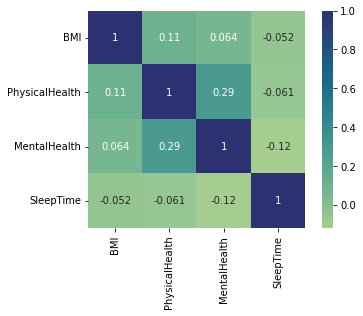

In [ ]:
#Numerical Features correlation
nfc = sns.heatmap(data[Conti].corr(),annot=True,square = True,cbar = True,xticklabels = True, yticklabels = True,cmap="crest")
nfc#.xaxis.tick_top()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

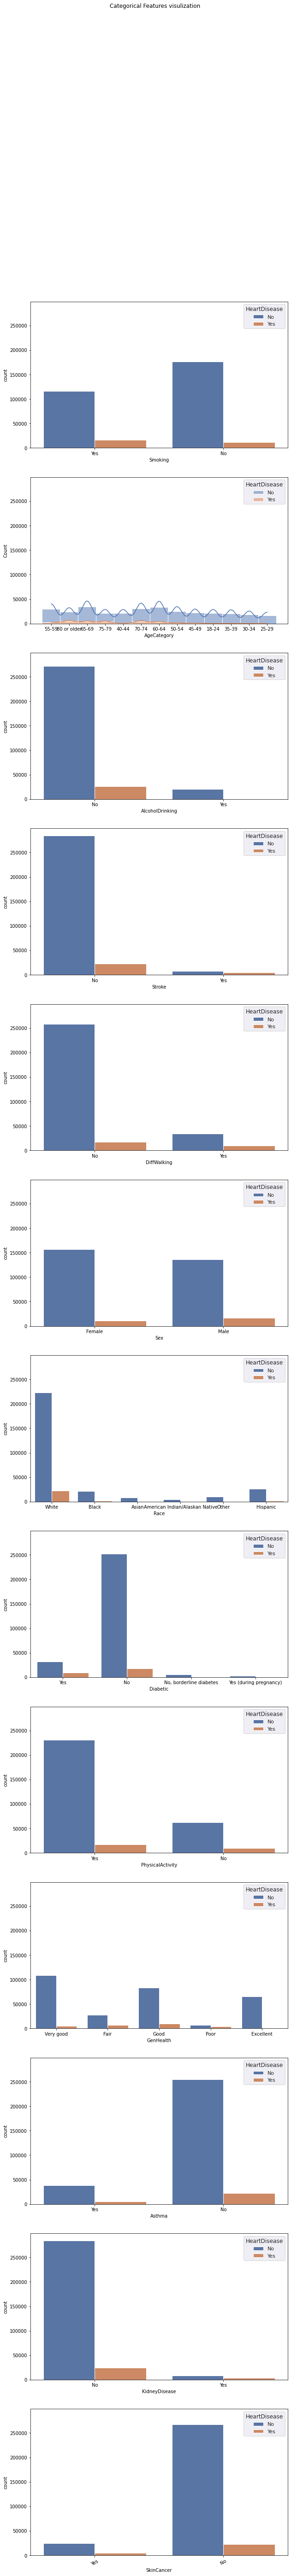

In [44]:
# Categorical Features visulization
fig, axes = plt.subplots(13, 1, figsize=(10, 90), sharey=True)
fig.suptitle('Categorical Features visulization')
sns.set(style='darkgrid')
sns.countplot(ax=axes[0],x = data.Smoking,hue= data.HeartDisease)
sns.histplot(ax=axes[1],x= data.AgeCategory,hue=data.HeartDisease,kde=True,multiple="stack")
plt.xticks(rotation=30)
sns.countplot(ax=axes[2],x = data.AlcoholDrinking,hue= data.HeartDisease)
sns.countplot(ax=axes[3],x = data.Stroke,hue= data.HeartDisease)
sns.countplot(ax=axes[4],x = data.DiffWalking,hue= data.HeartDisease)
sns.countplot(ax=axes[5],x = data.Sex,hue= data.HeartDisease)
sns.countplot(ax=axes[6],x = data.Race,hue= data.HeartDisease)
plt.xticks(rotation=30)
sns.countplot(ax=axes[7],x = data.Diabetic,hue= data.HeartDisease)
plt.xticks(rotation=30)
sns.countplot(ax=axes[8],x = data.PhysicalActivity,hue= data.HeartDisease)
sns.countplot(ax=axes[9],x = data.GenHealth,hue= data.HeartDisease)
plt.xticks(rotation=30)
sns.countplot(ax=axes[10],x = data.Asthma,hue= data.HeartDisease)
plt.xticks(rotation=30)
sns.countplot(ax=axes[11],x = data.KidneyDisease,hue= data.HeartDisease)
plt.xticks(rotation=30)
sns.countplot(ax=axes[12],x = data.SkinCancer,hue= data.HeartDisease)
plt.xticks(rotation=30)

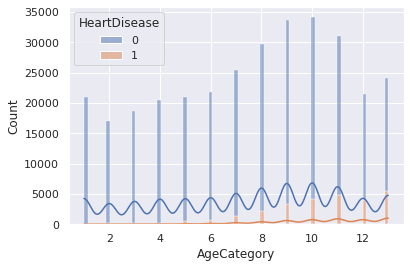

In [ ]:
sns.histplot(x= data.AgeCategory,hue=data.HeartDisease,kde=True,multiple="stack")

# Data proprocess

In [7]:
 #Numerical Features
for i in Conti:
    data[[i]] = StandardScaler().fit_transform(data[[i]]) #standardize

In [ ]:
# Categorical Features
#for i in Ob:
    #data[i] = LabelEncoder().fit_transform(data[i]) 
    ###Note: not sure some of the categorical data need to standardize, some are ordinal v

In [8]:
# Categorical Features - AgeCategory
data.loc[(data.AgeCategory == "18-24"), 'AgeCategory'] = 1
data.loc[(data.AgeCategory == "25-29"), 'AgeCategory'] = 2
data.loc[(data.AgeCategory == "30-34"), 'AgeCategory'] = 3
data.loc[(data.AgeCategory == "35-39"), 'AgeCategory'] = 4
data.loc[(data.AgeCategory == "40-44"), 'AgeCategory'] = 5
data.loc[(data.AgeCategory == "45-49"), 'AgeCategory'] = 6
data.loc[(data.AgeCategory == "50-54"), 'AgeCategory'] = 7
data.loc[(data.AgeCategory == "55-59"), 'AgeCategory'] = 8
data.loc[(data.AgeCategory == "60-64"), 'AgeCategory'] = 9
data.loc[(data.AgeCategory == "65-69"), 'AgeCategory'] = 10
data.loc[(data.AgeCategory == "70-74"), 'AgeCategory'] = 11 
data.loc[(data.AgeCategory == "75-79"), 'AgeCategory'] = 12
data.loc[(data.AgeCategory == "80 or older"), 'AgeCategory'] = 13

# Categorical Features - GenHealth
data.loc[(data.GenHealth == "Poor"), 'GenHealth'] = 1
data.loc[(data.GenHealth == "Fair"), 'GenHealth'] = 2
data.loc[(data.GenHealth == "Good"), 'GenHealth'] = 3
data.loc[(data.GenHealth == "Very good"), 'GenHealth'] = 4
data.loc[(data.GenHealth == "Excellent"), 'GenHealth'] = 5

# Categorical Features - Race (onehot encoding)
data.Race.unique()
onehot_enc = OneHotEncoder()
array = onehot_enc.fit_transform(np.array(data['Race']).reshape(-1,1))
array=array.toarray()
names = ['race_'+str(n) for n in range(len(array[0]))]
data = pd.concat([data,pd.DataFrame(array,columns = names)],axis = 1)
data = data.drop(['Race'],axis = 1)

data.rename(columns={"race_0": "American Indian/Alaskan Native", "race_1": "Asian","race_2": "Black","race_3": "Hispanic","race_4": "Other","race_5": "White"})

# Categorical Features - Diabetic (onehot encoding)
#data.Diabetic.unique()
onehot_enc = OneHotEncoder()
array = onehot_enc.fit_transform(np.array(data['Diabetic']).reshape(-1,1))
array = array.toarray()
names = ['diabetic_'+str(n) for n in range(len(array[0]))]
data = pd.concat([data,pd.DataFrame(array,columns = names)],axis = 1)
data = data.drop(['Diabetic'],axis = 1)

data.rename(columns={"diabetic_0": "diabetic_No", "diabetic_1": "diabetic_No(borderline diabetes)","diabetic_2": "diabetic_Yes","diabetic_3": "diabetic_Yes(during pregnancy)"})

# Categorical Features_rest
Ob_rest = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
for i in Ob_rest:
    data[i] = LabelEncoder().fit_transform(data[i]) 


In [ ]:
# Check if the data is balanced or not
print(len(data.HeartDisease[data.HeartDisease== 0]) / len(data)) #0 for no
print(len(data.HeartDisease[data.HeartDisease== 1]) / len(data)) #1 for yes

0.9144045404086993
0.08559545959130067


In [9]:
# to balance the data
X = data.copy()            
y = X.pop('HeartDisease')
ROS = RandomOverSampler(random_state=878) # due to the severe class imbalance (the target)
X, y = ROS.fit_resample(X, y)

In [ ]:
# check if the data is balaced after the process
y.describe()

count    584844.0
mean          0.5
std           0.5
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: HeartDisease, dtype: float64

In [10]:
# Split the data into traning and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=878)

# H2o auto model (as an overview)

In [ ]:
X_y_train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis='columns'))
#X_test_h2o = h2o.H2OFrame(X_test)
X_y_test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis='columns'))
X_y_train_h2o['HeartDisease'] = X_y_train_h2o['HeartDisease'].asfactor() 
X_y_test_h2o['HeartDisease'] = X_y_test_h2o['HeartDisease'].asfactor() 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
auto = H2OAutoML(
    max_runtime_secs=(60*6*3),  #10 min
    max_models=None,  # no limit
    seed=878,
    nfolds = 5,
    #top_n_features = 5,
    keep_cross_validation_predictions = True, 
    keep_cross_validation_fold_assignment = True,
    include_algos = ["GLM", "DeepLearning", "DRF","XGBoost","StackedEnsemble","GBM"]
)

auto.train(
    x=data.columns.to_list()[1:], 
    y='HeartDisease', 
    training_frame = X_y_train_h2o
 )


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20221211_193341


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1                  1                           229930                 20           20           20            18253         18253         18253

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11185399602012122
RMSE: 0.3344458043093398
LogLoss: 1.0628948021655085
Mean Per-Class Error: 0.15230615679612539
AUC: 0.9128705412123609
AUCPR: 0.8732945658984178
Gini: 0.8257410824247218

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.375
       0      1       Error    Rate
-----  -----  ------  -------  ------------------
0      64720  21310   0.2477   (21310.0/86030.0)
1      4909   81353   0.0569   (4909.0/86262.0)
Total  69629  102663  0.1522   (26219.0/172292.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.375        0.86122   269
max f2                       0.166542     0.922459  338
max f0point5                 0.653266     0.84131   170
max accuracy                 0.499996     0.850591  228
max precision                0.95841      0.899565  19
max recall                   0            1         399
max specificity              1            0.956004  0
max absolute_mcc             0.375        0.708532  269
max min_per_class_accuracy   0.638158     0.839106  177
max mean_per_class_accuracy  0.499996     0.850512  228
max tns                      1            82245     0
max fns                      1            53141     0
max fps                      0            86030     399
max tps                      0            86262     399
max tnr                      1            0.956004  0
max fnr                      1            0.616042  0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 19.29 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.07888                     1                  1.79426   1.79426            0.897442         1          0.897442                    1                   0.141531        0.141531                   79.4259   79.4259            0.125346
2        0.100247                    0.913534           1.78951   1.79325            0.895069         0.945418   0.896936                    0.988366            0.0382362       0.179767                   78.9514   79.3248            0.159097
3        0.150074                    0.780992           1.63774   1.74162            0.819157         0.847724   0.871112                    0.941671            0.0816045       0.261372                   63.7743   74.1617            0.222673
4        0.200028                    0.54717            1.34909   1.64359            0.674782         0.672613   0.822082                    0.874478            0.067392        0.328764                   34.9094   64.3591            0.257562
5        1                           0                  0.839074  1                  0.419683         0.0224406  0.500174                  

In [ ]:
lb = auto.leaderboard
lb.head(rows=lb.nrows)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
DRF_1_AutoML_1_20221211_193341                           0.929328   0.65826   0.9038                  0.127198  0.319932  0.102357
StackedEnsemble_BestOfFamily_2_AutoML_1_20221211_193341  0.927212   0.338447  0.911058                0.147625  0.324687  0.105422
StackedEnsemble_AllModels_1_AutoML_1_20221211_193341     0.926003   0.397085  0.910622                0.149901  0.348188  0.121235
XGBoost_1_AutoML_1_20221211_193341                       0.902371   0.393509  0.882019                0.174656  0.353063  0.124654
StackedEnsemble_BestOfFamily_1_AutoML_1_20221211_193341  0.902365   0.386869  0.882035                0.1749    0.35115   0.123306
GBM_1_AutoML_1_20221211_193341                           0.87857    0.443935  0.860571                0.208409  0.377135  0.142231
XGBoost_2_AutoML_1_20221211_193341                       0.84246    0.542392  0.81748                 0.235029  0.423178  0.17908
GLM_1_AutoML_1_20221211_193341                           0.841338   0.492826  0.822572                0.24065   0.402114  0.161696
GBM_4_AutoML_1_20221211_193341                           0.839224   0.631599  0.815305                0.237409  0.468494  0.219487
GBM_2_AutoML_1_20221211_193341                           0.83702    0.591414  0.811157                0.242948  0.447528  0.200281
GBM_3_AutoML_1_20221211_193341                           0.836947   0.604981  0.810796                0.241501  0.454646  0.206703
[11 rows x 7 columns]

In [ ]:
auto.leader

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20221211_193341


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1                  1                           229930                 20           20           20            18253         18253         18253

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11185399602012122
RMSE: 0.3344458043093398
LogLoss: 1.0628948021655085
Mean Per-Class Error: 0.15230615679612539
AUC: 0.9128705412123609
AUCPR: 0.8732945658984178
Gini: 0.8257410824247218

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.375
       0      1       Error    Rate
-----  -----  ------  -------  ------------------
0      64720  21310   0.2477   (21310.0/86030.0)
1      4909   81353   0.0569   (4909.0/86262.0)
Total  69629  102663  0.1522   (26219.0/172292.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.375        0.86122   269
max f2                       0.166542     0.922459  338
max f0point5                 0.653266     0.84131   170
max accuracy                 0.499996     0.850591  228
max precision                0.95841      0.899565  19
max recall                   0            1         399
max specificity              1            0.956004  0
max absolute_mcc             0.375        0.708532  269
max min_per_class_accuracy   0.638158     0.839106  177
max mean_per_class_accuracy  0.499996     0.850512  228
max tns                      1            82245     0
max fns                      1            53141     0
max fps                      0            86030     399
max tps                      0            86262     399
max tnr                      1            0.956004  0
max fnr                      1            0.616042  0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 19.29 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.07888                     1                  1.79426   1.79426            0.897442         1          0.897442                    1                   0.141531        0.141531                   79.4259   79.4259            0.125346
2        0.100247                    0.913534           1.78951   1.79325            0.895069         0.945418   0.896936                    0.988366            0.0382362       0.179767                   78.9514   79.3248            0.159097
3        0.150074                    0.780992           1.63774   1.74162            0.819157         0.847724   0.871112                    0.941671            0.0816045       0.261372                   63.7743   74.1617            0.222673
4        0.200028                    0.54717            1.34909   1.64359            0.674782         0.672613   0.822082                    0.874478            0.067392        0.328764                   34.9094   64.3591            0.257562
5        1                           0                  0.839074  1                  0.419683         0.0224406  0.500174                  

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_2_AutoML_1_20221211_193341  0.957812   0.260987  0.951434                0.109011  0.282931  0.0800502               17098                   0.00642   StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20221211_193341     0.95737    0.343257  0.952021                0.111208  0.315586  0.0995946                8137                   0.010362  StackedEnsemble
DRF_1_AutoML_1_20221211_193341                           0.943004   0.545142  0.925862                0.127947  0.301911  0.09115                  2602                   0.002068  DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20221211_193341  0.926187   0.343358  0.916914                0.153133  0.328647  0.108009                25214                   0.007599  StackedEnsemble
XGBoost_1_AutoML_1_20221211_193341                       0.926187   0.357843  0.916907                0.153011  0.333249  0.111055                47924                   0.005224  XGBoost
GBM_1_AutoML_1_20221211_193341                           0.896918   0.418364  0.887807                0.189115  0.363815  0.132361                43424                   0.013124  GBM
GBM_4_AutoML_1_20221211_193341                           0.847374   0.638864  0.833244                0.230519  0.472224  0.222995                 2302                   0.001984  GBM
XGBoost_2_AutoML_1_20221211_193341                       0.842994   0.537381  0.828563                0.246086  0.420225  0.176589                 4949                   0.001415  XGBoost
GBM_3_AutoML_1_20221211_193341                           0.842961   0.614756  0.826429                0.242525  0.459614  0.211245                 2729                   0.00198   GBM
GLM_1_AutoML_1_20221211_193341                           0.841385   0.49277   0.822612                0.239647  0.402091  0.161677                22086                   0.001617  GLM
GBM_2_AutoML_1_20221211_193341                           0.841039   0.598875  0.82201                 0.241685  0.451303  0.203675                 3006                   0.002498  GBM
[11 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20221211_193341

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43473504225255477
       0       1       Error    Rate
-----  ------  ------  -------  ------------------
0      189056  44800   0.1916   (44800.0/233856.0)
1      15053   218966  0.0643   (15053.0/234019.0)
Total  204109  263766  0.1279   (59853.0/467875.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

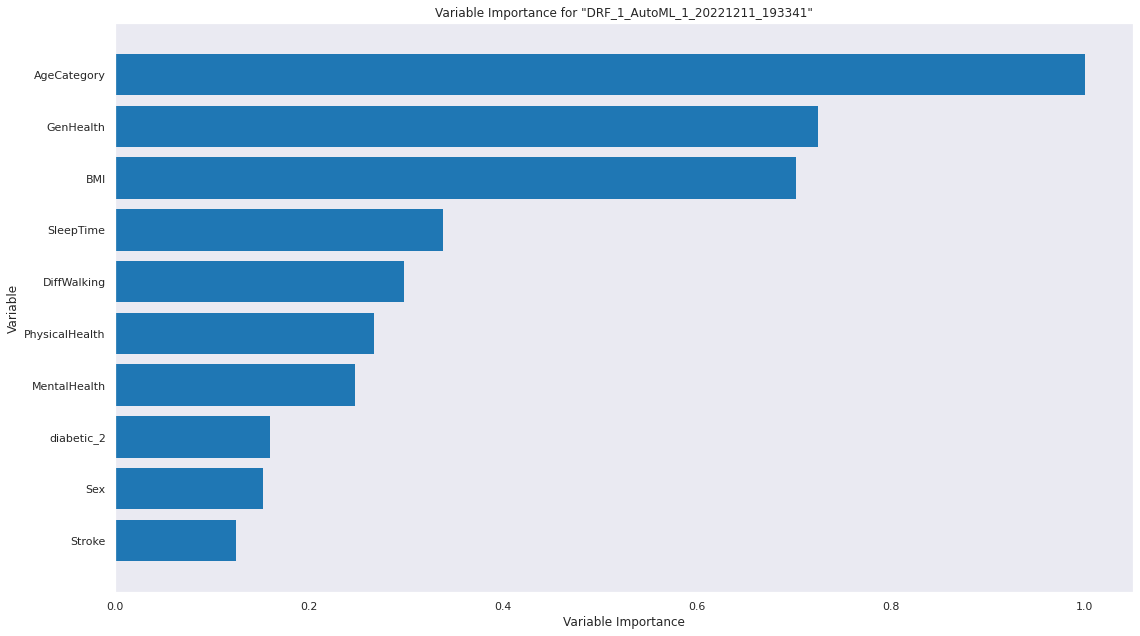

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

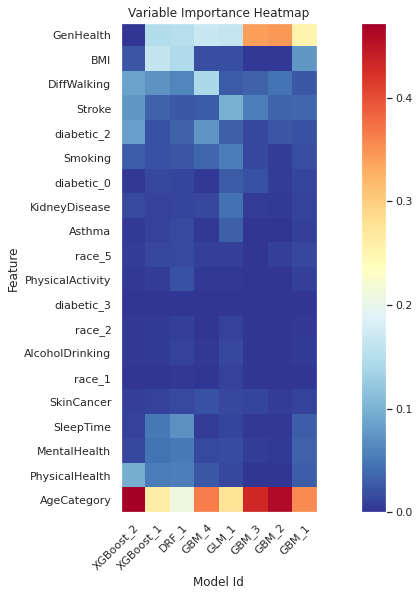

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

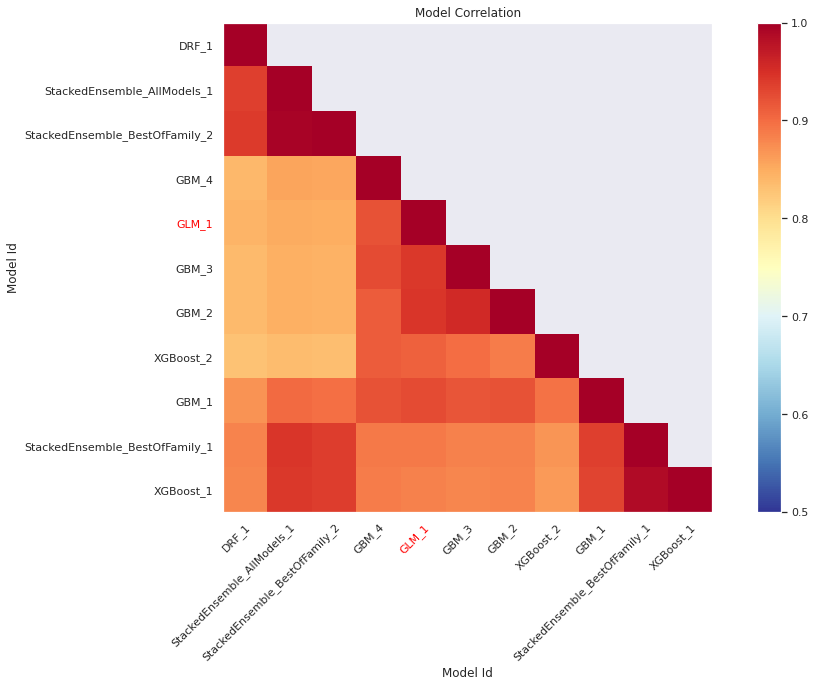

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

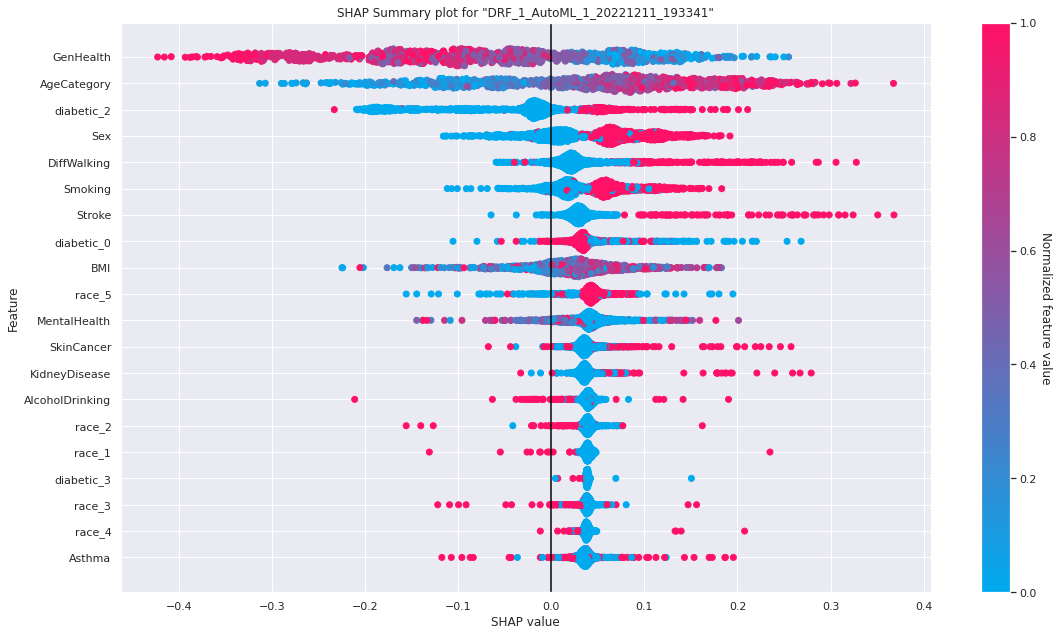

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

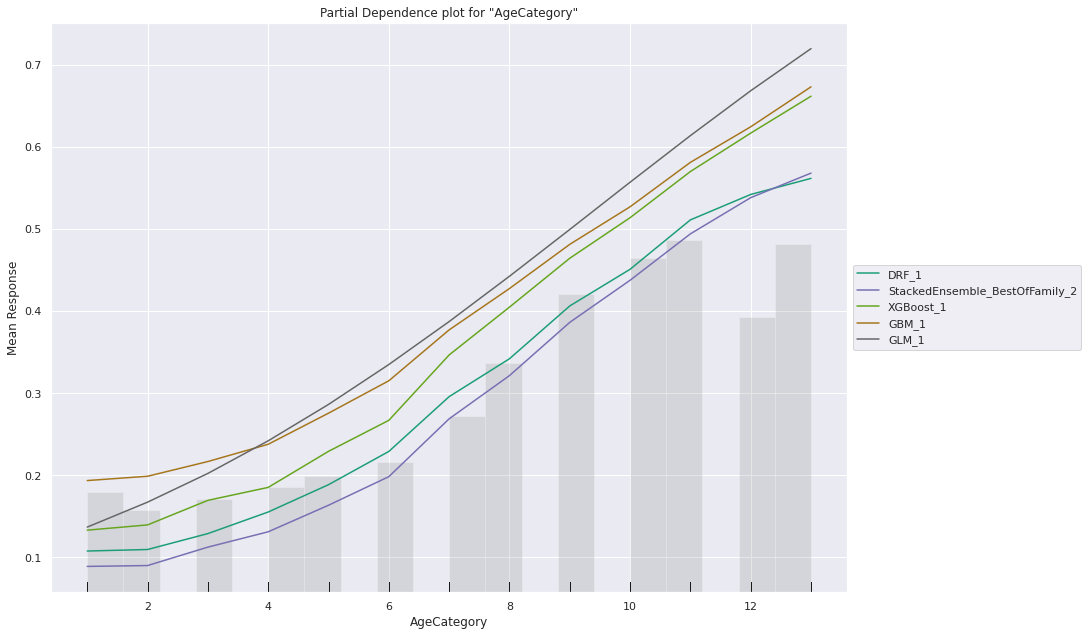

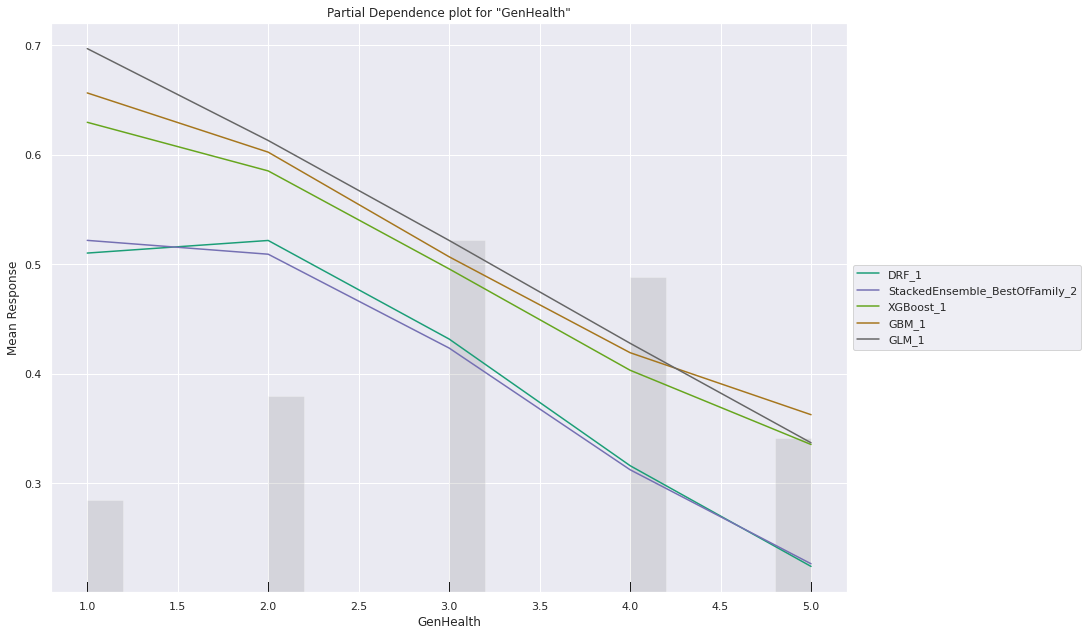

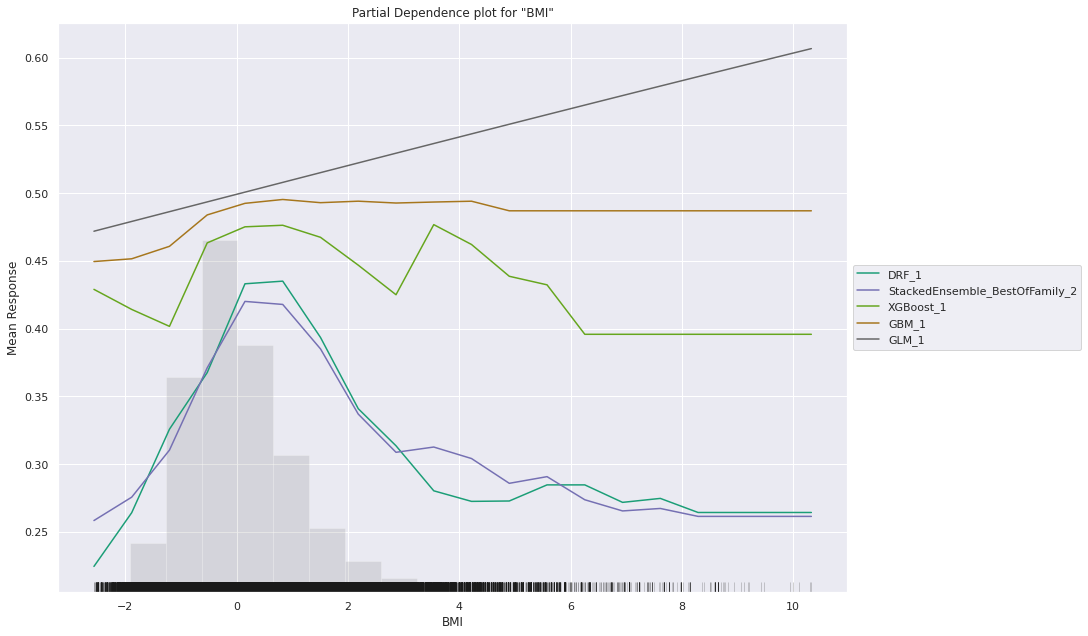

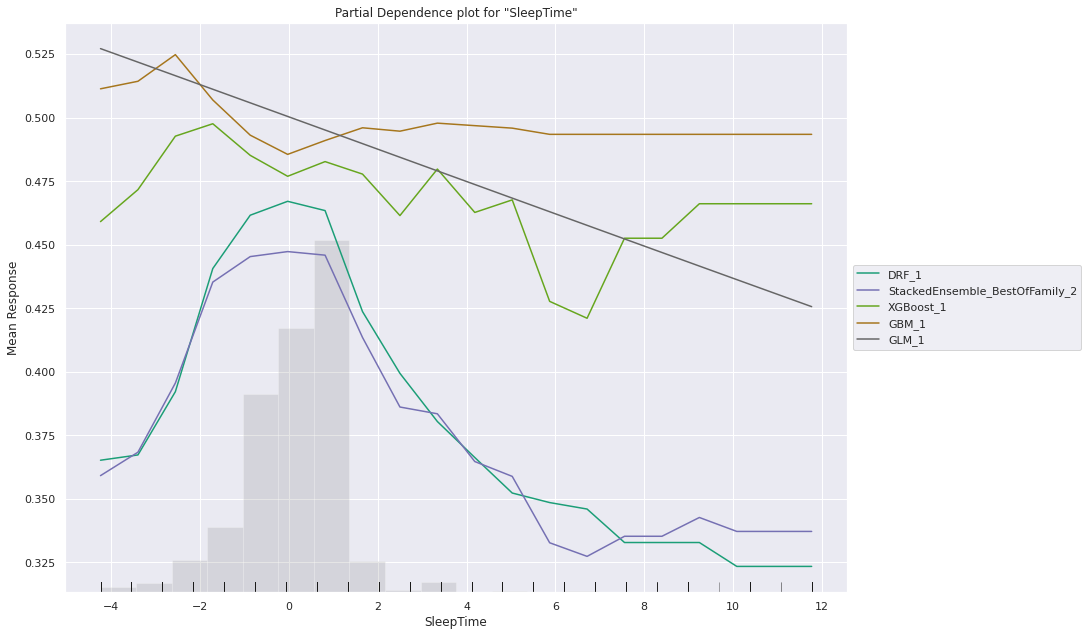

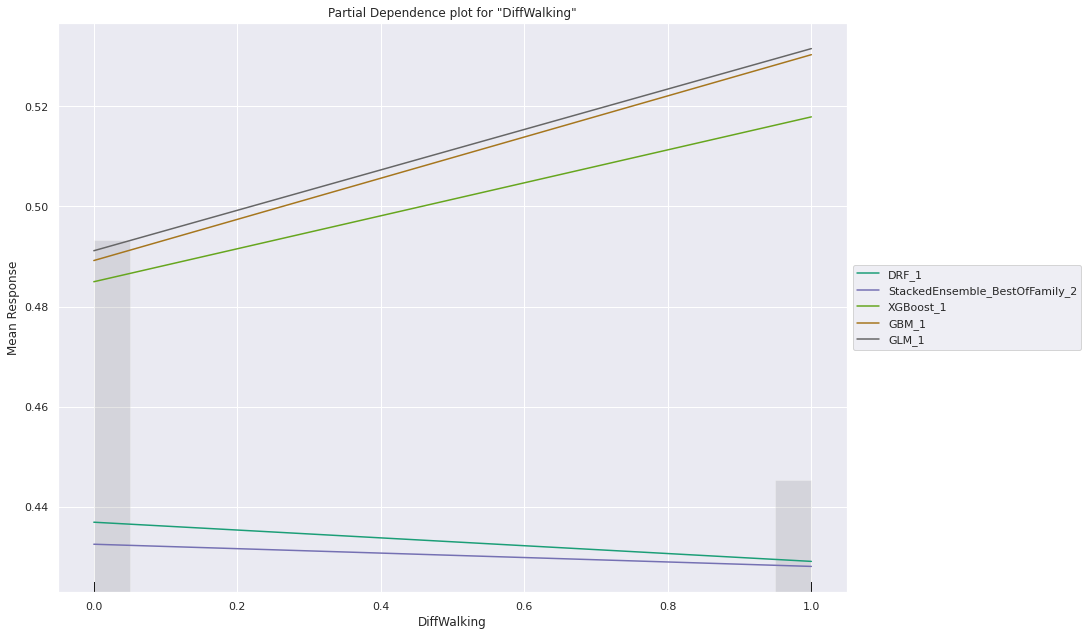

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_2_AutoML_1_20221211_193341  0.957812   0.260987  0.951434                0.109011  0.282931  0.0800502               17098                   0.00642   StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20221211_193341     0.95737    0.343257  0.952021                0.111208  0.315586  0.0995946                8137                   0.010362  StackedEnsemble
DRF_1_AutoML_1_20221211_193341                           0.943004   0.545142  0.925862                0.127947  0.301911  0.09115                  2602                   0.002068  DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20221211_193341  0.926187   0.343358  0.916914                0.153133  0.328647  0.108009                25214                   0.007599  StackedEnsemble
XGBoost_1_AutoML_1_20221211_193341                       0.926187   0.357843  0.916907                0.153011  0.333249  0.111055                47924                   0.005224  XGBoost
GBM_1_AutoML_1_20221211_193341                           0.896918   0.418364  0.887807                0.189115  0.363815  0.132361                43424                   0.013124  GBM
GBM_4_AutoML_1_20221211_193341                           0.847374   0.638864  0.833244                0.230519  0.472224  0.222995                 2302                   0.001984  GBM
XGBoost_2_AutoML_1_20221211_193341                       0.842994   0.537381  0.828563                0.246086  0.420225  0.176589                 4949                   0.001415  XGBoost
GBM_3_AutoML_1_20221211_193341                           0.842961   0.614756  0.826429                0.242525  0.459614  0.211245                 2729                   0.00198   GBM
GLM_1_AutoML_1_20221211_193341                           0.841385   0.49277   0.822612                0.239647  0.402091  0.161677                22086                   0.001617  GLM
GBM_2_AutoML_1_20221211_193341                           0.841039   0.598875  0.82201                 0.241685  0.451303  0.203675                 3006                   0.002498  GBM
[11 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20221211_193341

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43473504225255477
       0       1       Error    Rate
-----  ------  ------  -------  ------------------
0      189056  44800   0.1916   (44800.0/233856.0)
1      15053   218966  0.0643   (15053.0/234019.0)
Total  204109  263766  0.1279   (59853.0/467875.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

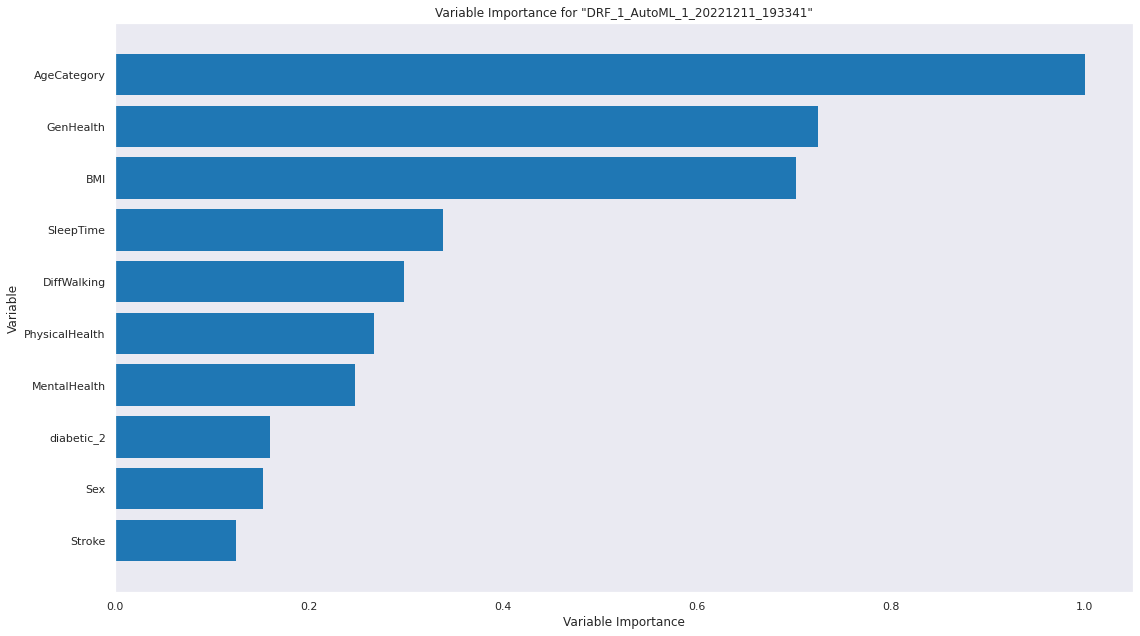

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

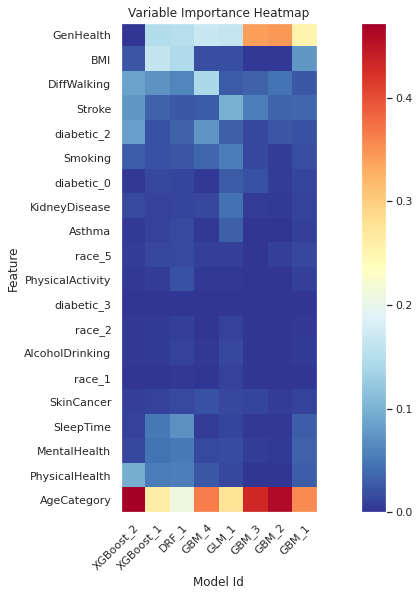

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

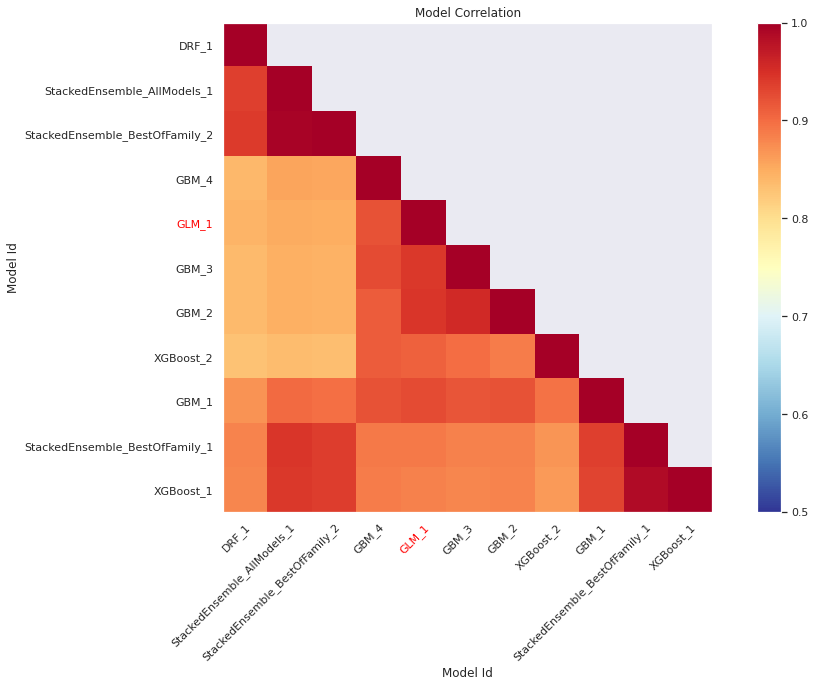

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

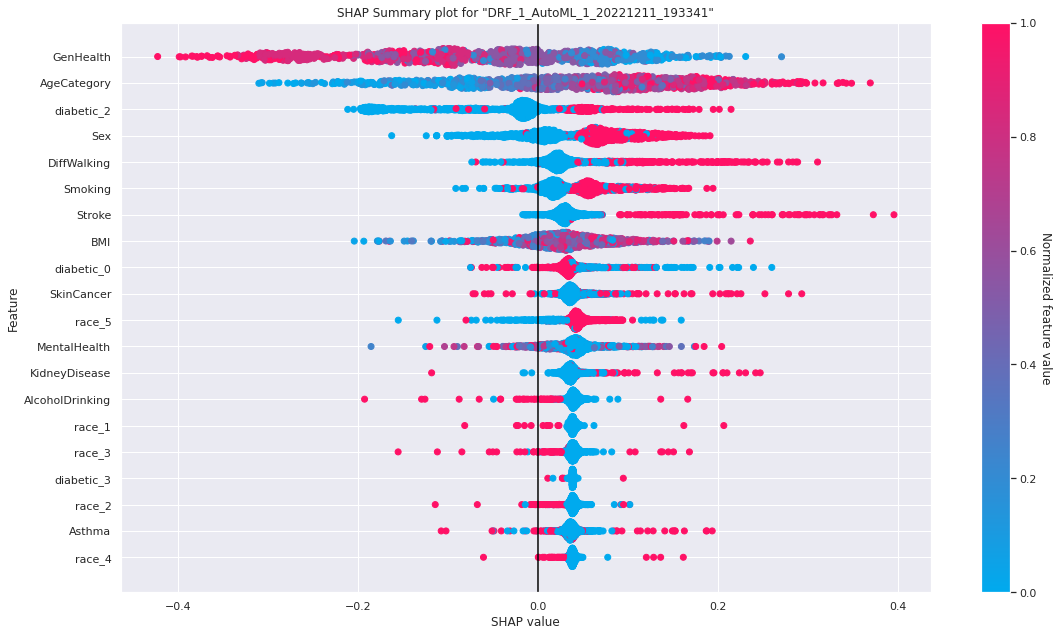

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

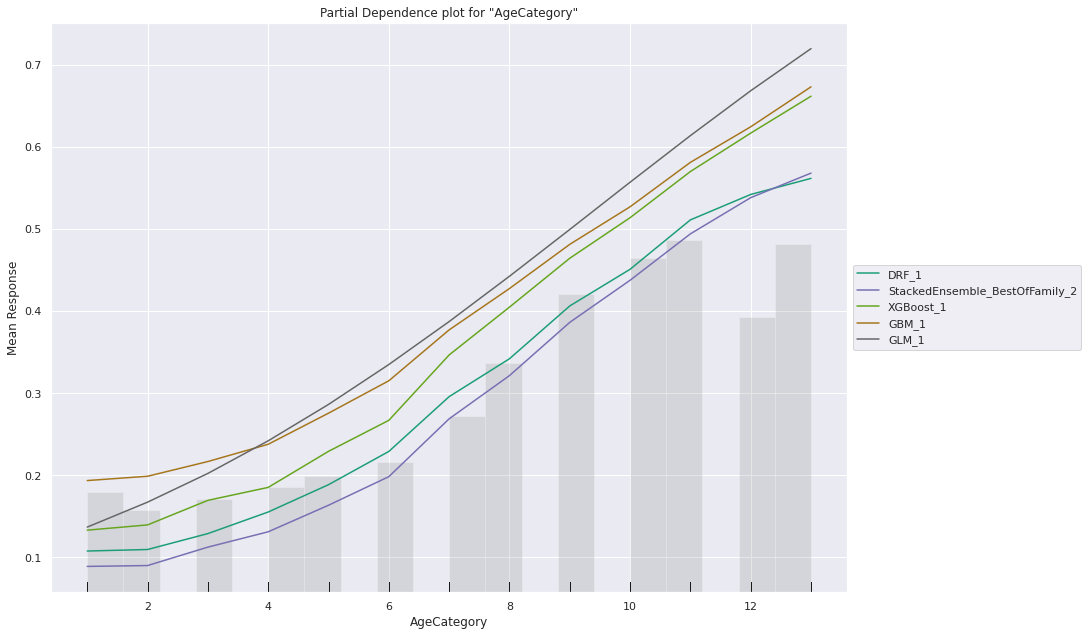

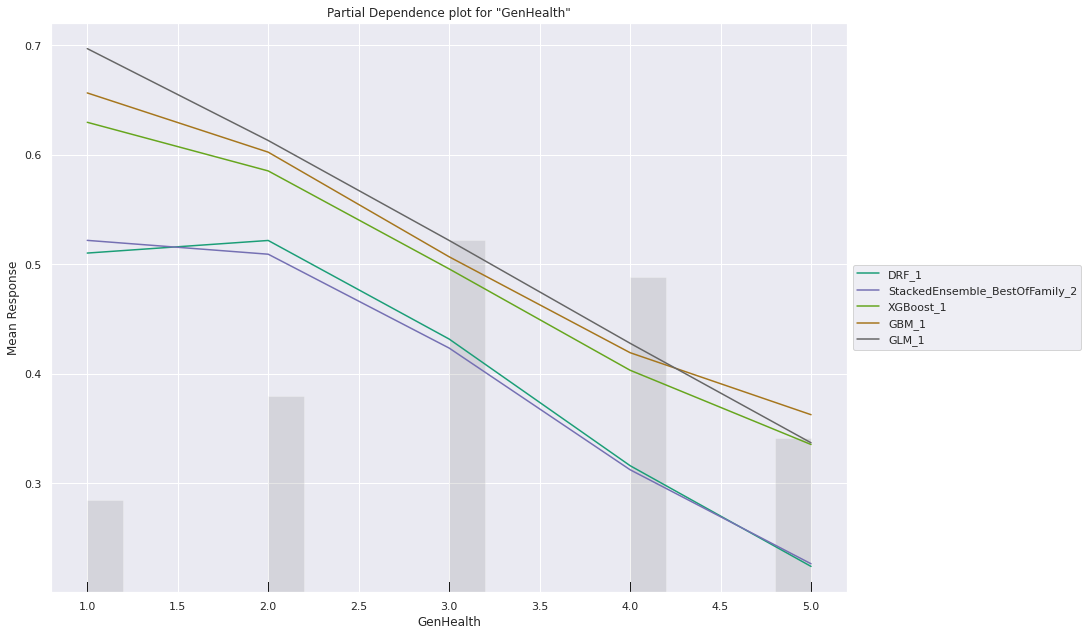

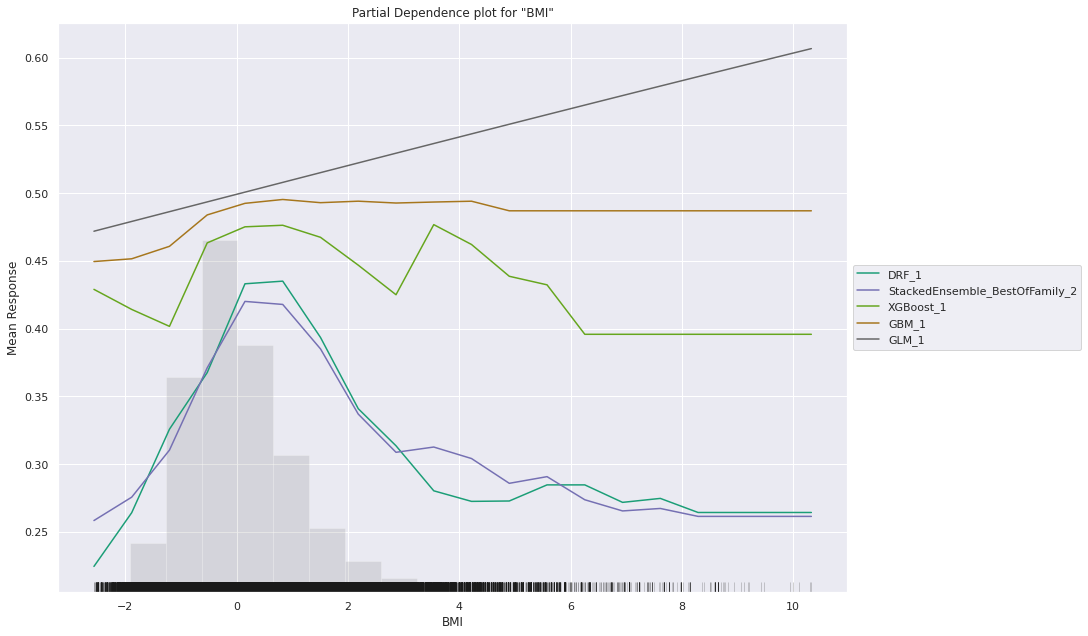

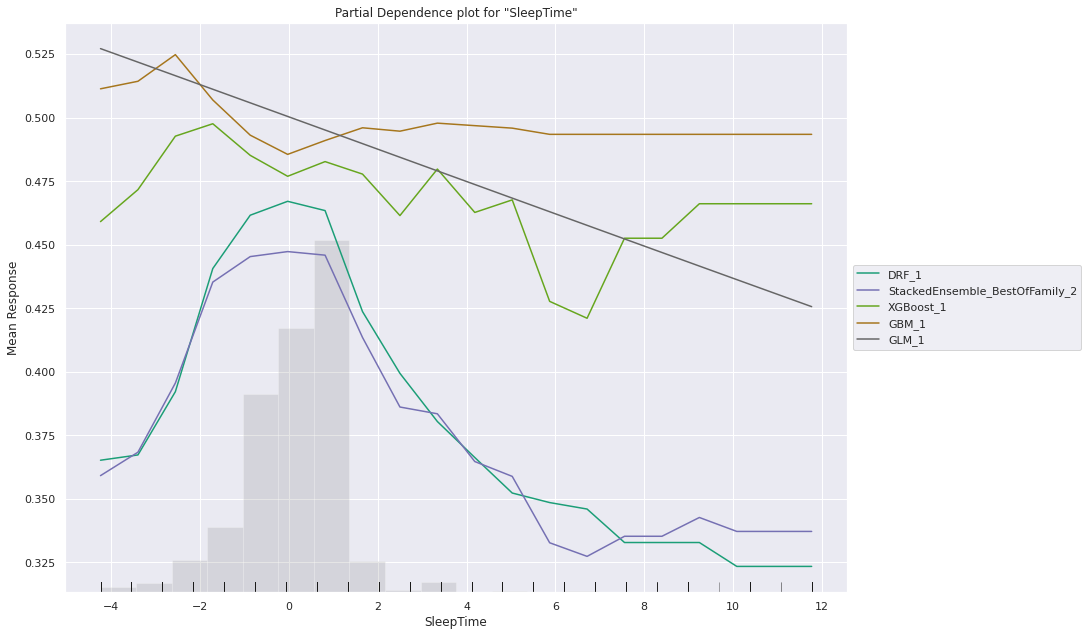

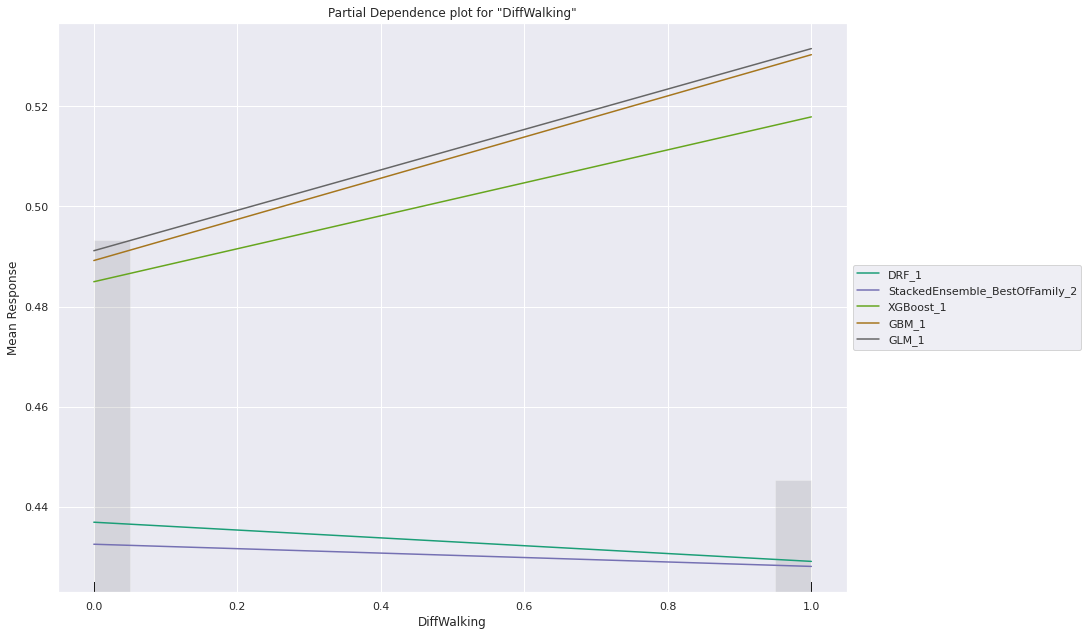

In [ ]:
# Explain a model
exm = auto.explain(X_y_train_h2o)

# Explain an AutoML object
exa = auto.explain(X_y_train_h2o)

In [ ]:
LB = auto.leaderboard
models = list(LB['model_id'].as_data_frame().iloc[:,0])
p = "/content/drive/My Drive/Colab Notebooks/auto" # path

for m_id in models:
    m = h2o.get_model(m_id)
    h2o.save_model(model=m, path=p, force=True)

In [ ]:
# model extraction
model_ids = h2o.as_list(auto.leaderboard[0], use_pandas=False)
model = h2o.get_model(lb[0,'model_id'])# for random forest model

In [ ]:
model_ids

[['model_id'],
 ['DRF_1_AutoML_1_20221211_193341'],
 ['StackedEnsemble_BestOfFamily_2_AutoML_1_20221211_193341'],
 ['StackedEnsemble_AllModels_1_AutoML_1_20221211_193341'],
 ['XGBoost_1_AutoML_1_20221211_193341'],
 ['StackedEnsemble_BestOfFamily_1_AutoML_1_20221211_193341'],
 ['GBM_1_AutoML_1_20221211_193341'],
 ['XGBoost_2_AutoML_1_20221211_193341'],
 ['GLM_1_AutoML_1_20221211_193341'],
 ['GBM_4_AutoML_1_20221211_193341'],
 ['GBM_2_AutoML_1_20221211_193341'],
 ['GBM_3_AutoML_1_20221211_193341']]

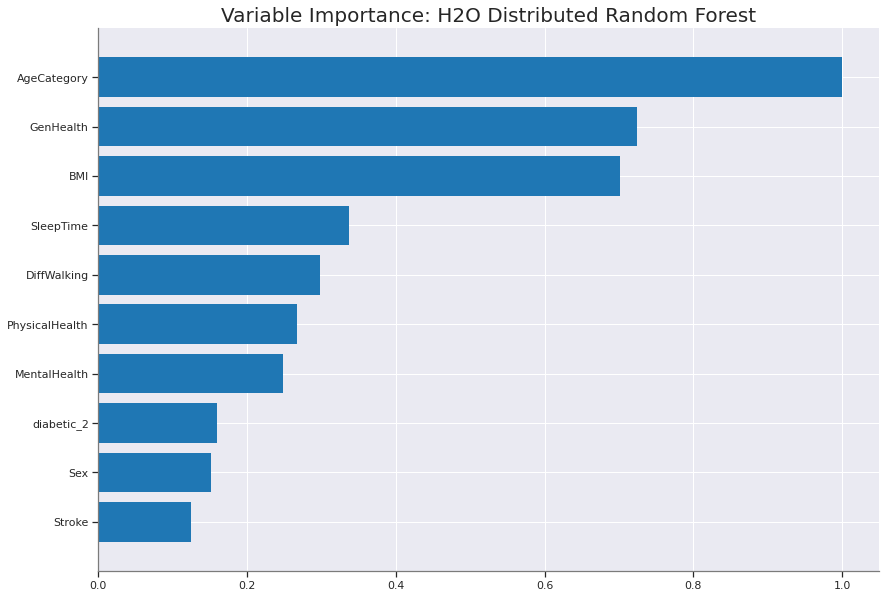

<Figure size 432x288 with 0 Axes>

In [ ]:
ra_plot = model.varimp_plot()

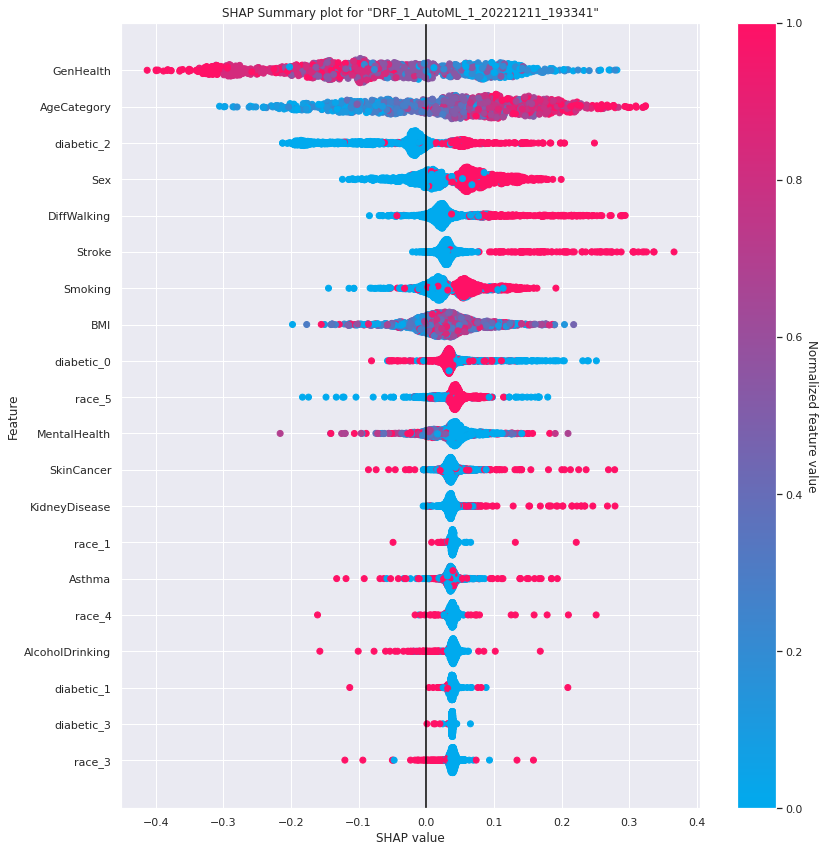

In [ ]:
shap_plot = model.shap_summary_plot(X_y_test_h2o)

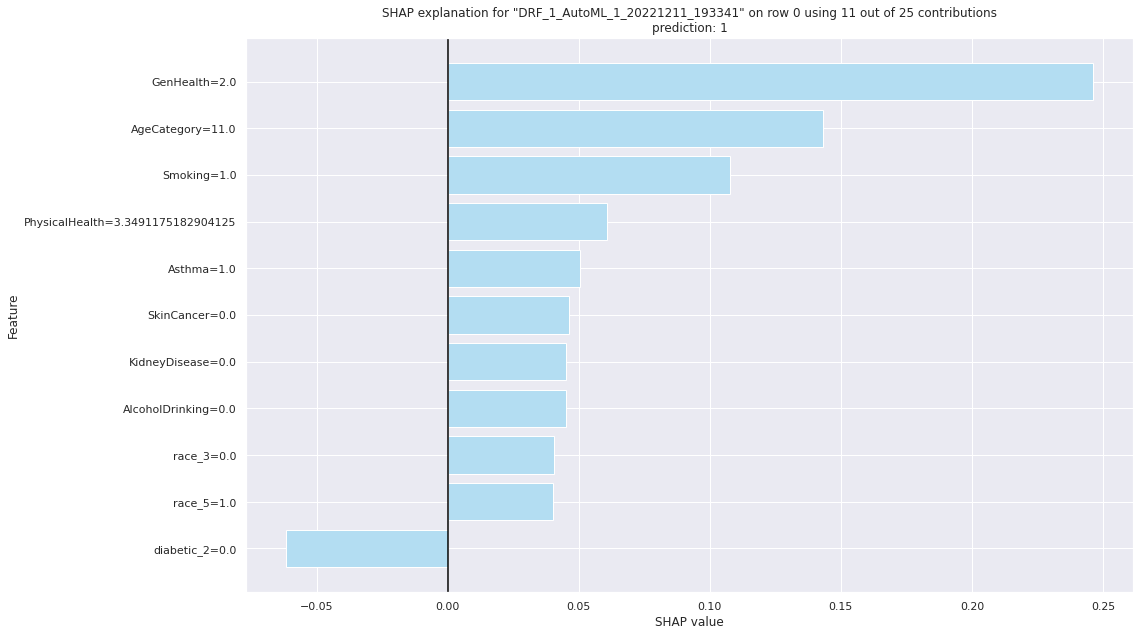

In [ ]:
shapr_plot = model.shap_explain_row_plot(X_y_test_h2o, row_index=0)

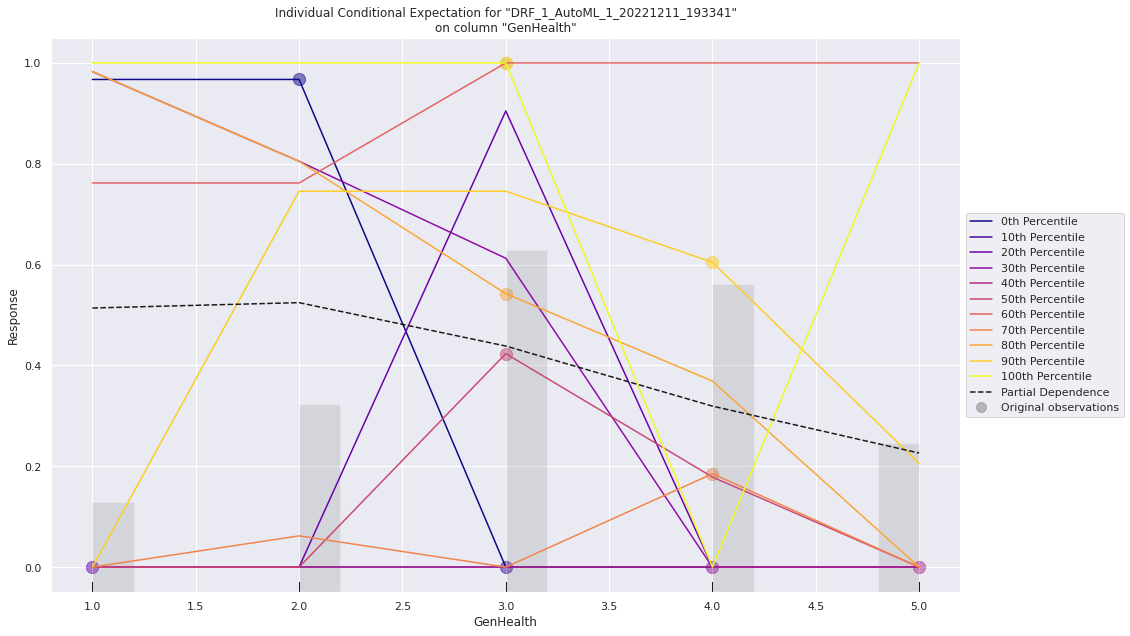

In [ ]:
ice_plot = model.ice_plot(X_y_test_h2o, "GenHealth")

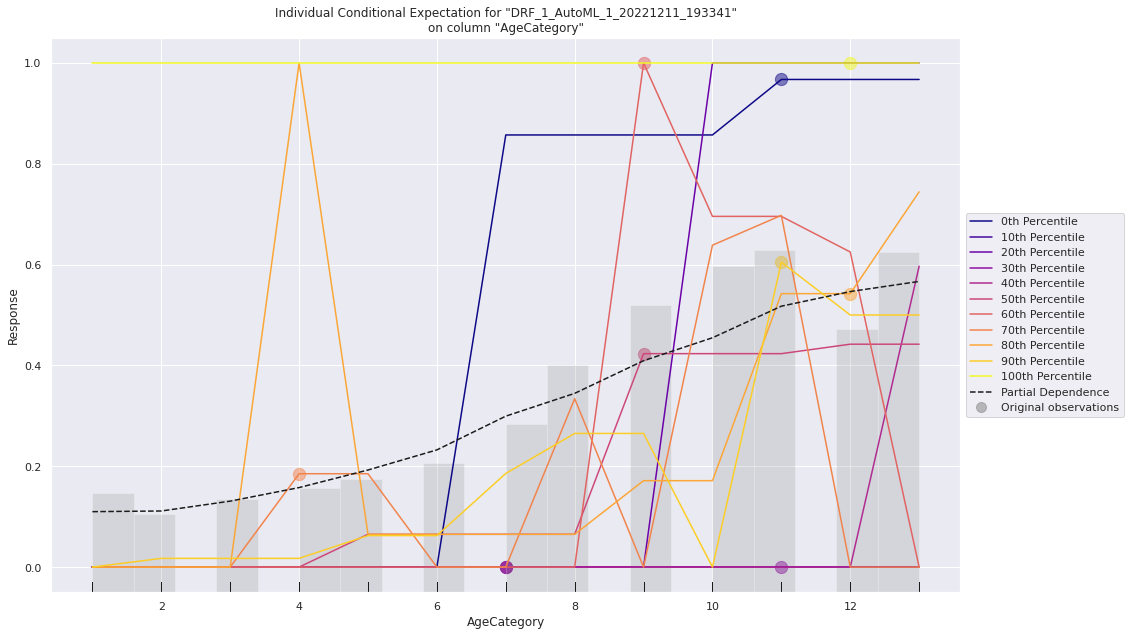

In [ ]:
ice_plot = model.ice_plot(X_y_test_h2o, "AgeCategory")

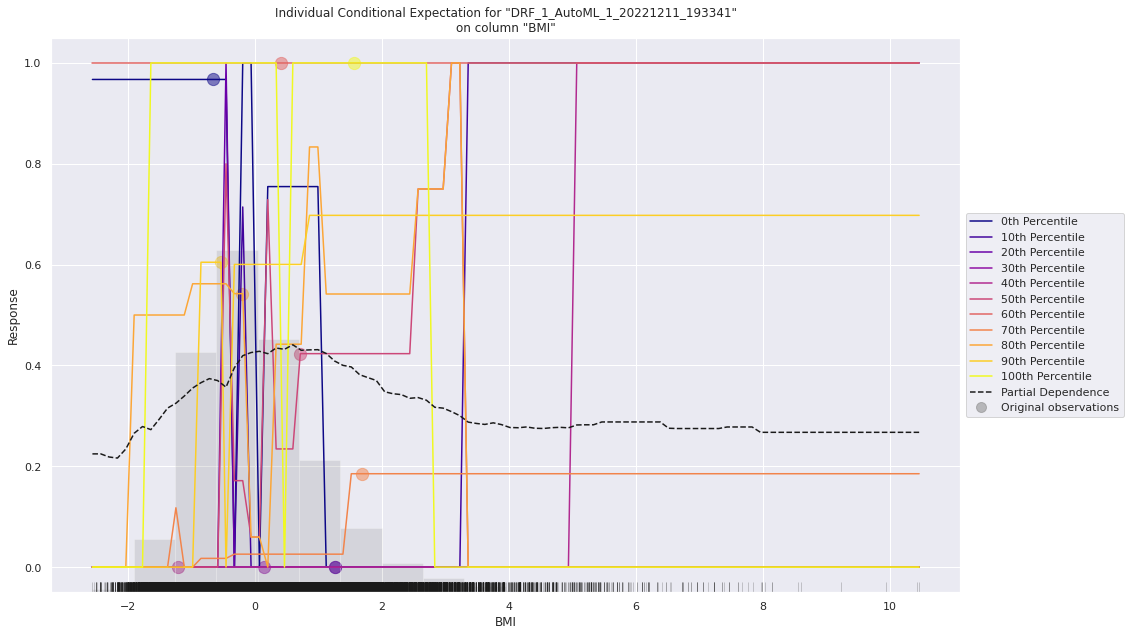

In [ ]:
ice_plot = model.ice_plot(X_y_test_h2o, "BMI")

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_2_AutoML_1_20221211_193341  0.932326   0.324222  0.911957                0.133463  0.31452   0.098923               17098                   0.006293  StackedEnsemble
DRF_1_AutoML_1_20221211_193341                           0.911947   1.08092   0.870798                0.151451  0.335618  0.112639                2602                   0.002022  DRF
GLM_1_AutoML_1_20221211_193341                           0.84082    0.493537  0.8213                  0.242275  0.40254   0.162039               22086                   0.001241  GLM
[3 rows x 10 columns]

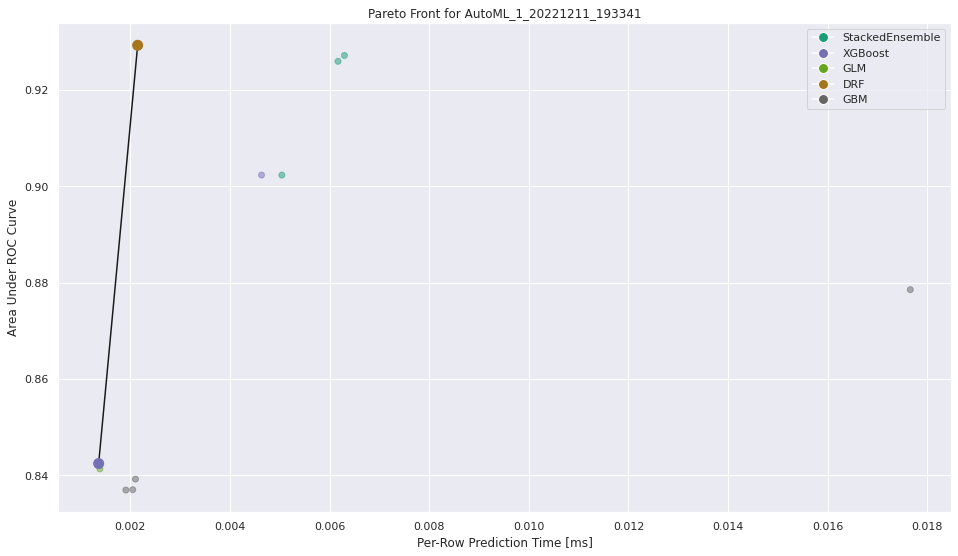

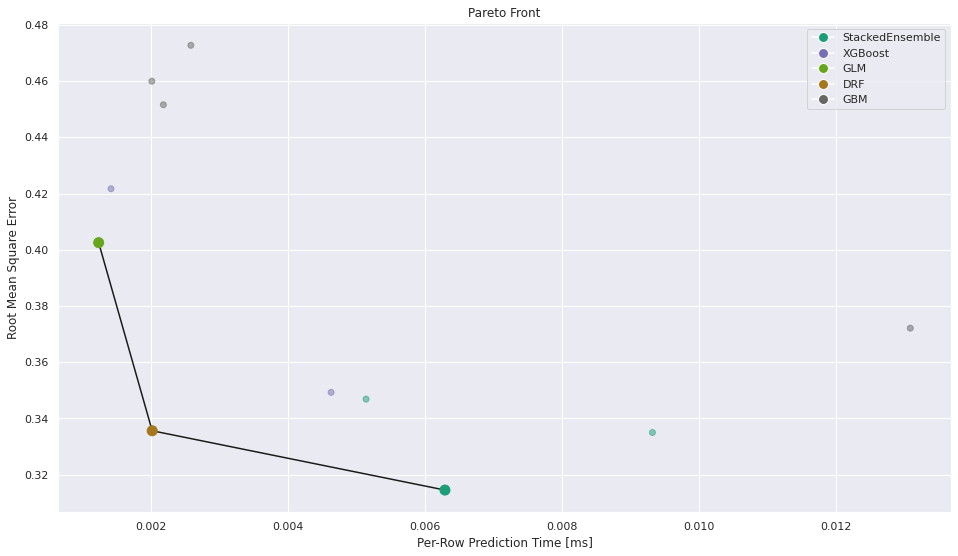

In [ ]:
pf = auto.pareto_front()
pf.figure() # get the Pareto front plot
pf # H2OFrame containing the Pareto front subset of the leaderboard

combined_leaderboard = h2o.make_leaderboard(auto, X_y_test_h2o, extra_columns="ALL")
pf = h2o.explanation.pareto_front(combined_leaderboard, x_metric="predict_time_per_row_ms", y_metric="rmse", optimum="bottom left")
pf.figure() # get the Pareto front plot
pf # H2OFrame containing the Pareto front subset of the leaderboard

# Model 1: Generalized Linear Models (GLM)


In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator

In [ ]:
X_y_train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis='columns'))
#X_test_h2o = h2o.H2OFrame(X_test)
X_y_test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis='columns'))
X_y_train_h2o['HeartDisease'] = X_y_train_h2o['HeartDisease'].asfactor() 
X_y_test_h2o['HeartDisease'] = X_y_test_h2o['HeartDisease'].asfactor() 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
glm = H2OGeneralizedLinearEstimator(family="binomial",
                          #hyper_params=hy_params,
                          lambda_=0,
                          #generate_variable_inflation_factors=True,
                          fold_assignment="modulo",
                          nfolds=5,
                          keep_cross_validation_models=True,
                          alpha = 0.5,
                          intercept = True,
                          link = "familydefault",
                          seed=878)


# Retrieve the variable inflation factors:
#glm.get_variable_inflation_factors() 

In [ ]:
glm.train(x=data.columns.to_list()[1:],                
              y='HeartDisease',
              training_frame = X_y_train_h2o,
              validation_frame = X_y_test_h2o)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1669737851215_75


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              25                            25                             5                       py_3_sid_b864

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.16167182120391982
RMSE: 0.40208434588270137
LogLoss: 0.49276850574395864
AUC: 0.8413749471876524
AUCPR: 0.8226058991892686
Gini: 0.6827498943753048
Null degrees of freedom: 467874
Residual degrees of freedom: 467849
Null deviance: 648612.4174225733
Residual deviance: 461108.1292499093
AIC: 461160.1292499093

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38979199801350495
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      150881  82975   0.3548   (82975.0/233856.0)
1      29211   204808  0.1248   (29211.0/234019.0)
Total  180092  287783  0.2398   (112186.0/467875.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.389792     0.785003  245
max f2                       0.209708     0.867803  317
max f0point5                 0.579748     0.766703  172
max accuracy                 0.464702     0.766046  217
max precision                0.992905     0.978155  0
max recall                   0.0123727    1         399
max specificity              0.992905     0.999962  0
max absolute_mcc             0.405585     0.536457  239
max min_per_class_accuracy   0.518093     0.763166  196
max mean_per_class_accuracy  0.464702     0.766029  217
max tns                      0.992905     233847    0
max fns                      0.992905     233616    0
max fps                      0.0123727    233856    399
max tps                      0.0123727    234019    399
max tnr                      0.992905     0.999962  0
max fnr                      0.992905     0.998278  0
max fpr                      0.0123727    1         399
max tpr                      0.0123727    1         399

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 50.02 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100005                   0.975947           1.91897    1.91897            0.95982          0.983336   0.95982                     0.983336            0.0191907       0.0191907                  91.8972    91.8972            0.0183868
2        0.0200011                   0.964954           1.86941    1.89419            0.935029         0.970322   0.947425                    0.976829            0.0186951       0.0378858                  86.9406    89.4189            0.035782
3        0.0300059                   0.954442           1.8528     1.88039            0.926725         0.959553   0.940523                    0.971069            0.018537        0.0564228                  85.2805    88.0391            0.0528522
4        0.0400085                   0.94574            1.84594    1.87178            0.923291         0.950029   0.936215                    0.965809            0.0184643       0.0748871                  84.5938    87.1777            0.0697814
5

In [ ]:
glm.cross_validation_fold_assignment()
perf = glm.model_performance()
pred = glm.predict(X_y_test_h2o)
feature_interactions = glm.feature_interaction()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
No calculation available for this model


In [ ]:
print('Gini Coefficient\n', glm.gini(train=True, valid=True, xval=False))
print('MCC\n', glm.mcc(train=True, valid=True, xval=False))
print('F1\n', glm.F1(train=True, valid=True, xval=False))
print('accuracy\n', glm.accuracy(train=True, valid=True, xval=False))
print('auc\n', glm.auc(train=True, valid=True, xval=False))
print('aucpr\n', glm.aucpr(train=True, valid=True, xval=False))

Gini Coefficient
 {'train': 0.6827498943753048, 'valid': 0.6816138424706377}
MCC
 {'train': [[0.4055849872235299, 0.5364567683805984]], 'valid': [[0.4463048642560714, 0.5318186369679051]]}
F1
 {'train': [[0.38979199801350495, 0.7850027405031027]], 'valid': [[0.38454093613269635, 0.7830535693801859]]}
accuracy
 {'train': [[0.4647020261883335, 0.766046486775314]], 'valid': [[0.46398457397707027, 0.764501705580111]]}
auc
 {'train': 0.8413749471876524, 'valid': 0.8408069212353189}
aucpr
 {'train': 0.8226058991892686, 'valid': 0.8213213624477088}


In [ ]:
glm.score_history()

timestamp    duration  iterations  negative_log_likelihood  \
0    2022-11-27 20:03:11   0.000 sec           0            324306.208711   
1    2022-11-27 20:03:12   0.836 sec           1            237380.817630   
2    2022-11-27 20:03:12   1.227 sec           2            230836.906914   
3    2022-11-27 20:03:13   1.616 sec           3            230554.935267   
4    2022-11-27 20:03:13   2.024 sec           4            230554.064220   
5    2022-11-27 20:03:13   2.380 sec           5            230554.064625   

   objective training_rmse training_logloss training_r2 training_auc  \
0   0.693147                                                           
1   0.507359                                                           
2   0.493373                                                           
3   0.492770                                                           
4   0.492769                                                           
5   0.492769      0.402084         0.492769    0.353313     0.841375   

  training_pr_auc training_lift training_classification_error  
0                                                              
1                                                              
2                                                              
3                                                              
4                                                              
5        0.822606      1.918972                      0.239778

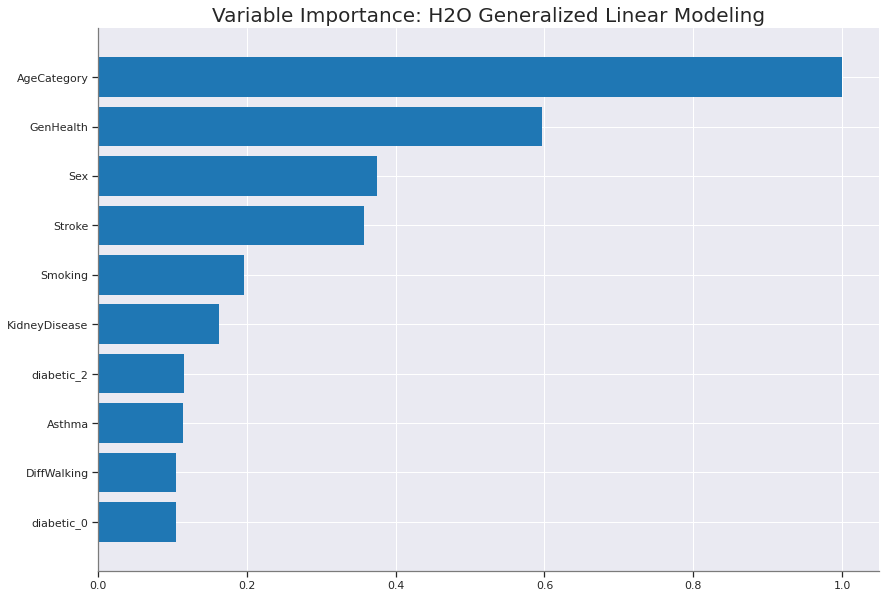

<Figure size 432x288 with 0 Axes>

In [ ]:
glm.varimp_plot()

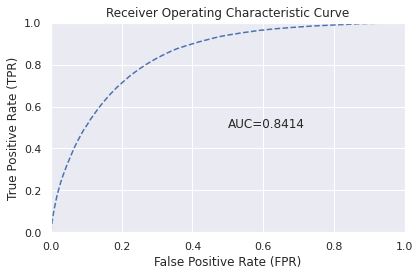

([3.848522167487685e-05,
  9.835112205801861e-05,
  0.00017532156540777232,
  0.0003335385878489327,
  0.0005601737821565408,
  0.0007654282977558839,
  0.001056205528188287,
  0.001270012315270936,
  0.0016078270388615217,
  0.0017959770114942528,
  0.0021380678708264917,
  0.0023775314723590586,
  0.00272389846743295,
  0.003006123426382047,
  0.0033610426929392445,
  0.0037245142309797483,
  0.004100814176245211,
  0.004340277777777778,
  0.004900451559934319,
  0.005319512862616311,
  0.005866858237547893,
  0.006362889983579639,
  0.006858921729611385,
  0.00741054324028462,
  0.0076542829775588395,
  0.008128934044882321,
  0.008736145320197045,
  0.009091064586754242,
  0.00963413382594417,
  0.010023262178434592,
  0.01053639846743295,
  0.011280446086480569,
  0.01188338122605364,
  0.012456383415435139,
  0.013174774220032841,
  0.013465551450465244,
  0.014128352490421455,
  0.014782601258894362,
  0.015428297755883964,
  0.016121031746031748,
  0.016822318007662835,
  0.017

In [ ]:
perf.plot(type = "roc")

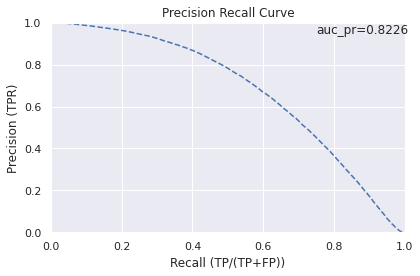

([0.9929049711311508,
  0.9893734105813194,
  0.9858282074852205,
  0.9830079505807456,
  0.9803321154195037,
  0.9774165465679502,
  0.9748490431375894,
  0.9725737460923394,
  0.9700637683498143,
  0.9681670700937507,
  0.9660139482090394,
  0.9640097552088506,
  0.9620473800542297,
  0.9596542226423617,
  0.9573565192225661,
  0.9545955110329083,
  0.9521976660977012,
  0.9502404620428628,
  0.9484770999951112,
  0.9458308940718888,
  0.9429738317361812,
  0.9402641011180899,
  0.9379792396949174,
  0.9355499994224934,
  0.9340945531764556,
  0.9322782484515294,
  0.929751377517824,
  0.9279024316376981,
  0.9257996944694712,
  0.9239049570233032,
  0.9222603484690179,
  0.9195166836682765,
  0.9170419540900657,
  0.9148742393719294,
  0.9123291755414351,
  0.9105486763774161,
  0.9088234831201403,
  0.9062695207895306,
  0.9040054305716635,
  0.9015030015102001,
  0.8990639641433983,
  0.8970257454957684,
  0.89455121923927,
  0.8916548133532449,
  0.8895142322098255,
  0.887273120

In [ ]:
perf.plot(type = "pr")

In [ ]:
h2o.save_model(model=glm, path="/content/drive/My Drive/Colab Notebooks", force=True)

'/content/drive/My Drive/Colab Notebooks/GLM_model_python_1669578349688_34'

In [ ]:
glm.download_mojo(path="/content/drive/My Drive/Colab Notebooks", get_genmodel_jar=True)

'/content/drive/My Drive/Colab Notebooks/GLM_model_python_1669578349688_34.zip'

# Model 2: Support Vector Machine (SVM)


In [ ]:
from h2o.estimators import H2OSupportVectorMachineEstimator

In [ ]:
X_y_train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis='columns'))
#X_test_h2o = h2o.H2OFrame(X_test)
X_y_test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis='columns'))
X_y_train_h2o['HeartDisease'] = X_y_train_h2o['HeartDisease'].asfactor() 
X_y_test_h2o['HeartDisease'] = X_y_test_h2o['HeartDisease'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
svm = H2OSupportVectorMachineEstimator(#hyper_params=hy_params
                          gamma=0.01,
                          rank_ratio = 0.1,
                          disable_training_metrics = False,
                          seed=878)
svm.train(x=data.columns.to_list()[1:],                
              y='HeartDisease',
              training_frame = X_y_train_h2o,
              validation_frame = X_y_test_h2o)

In [ ]:
svm.cross_validation_fold_assignment()
perf = svm.model_performance()
pred = svm.predict(X_y_test_h2o)
feature_interactions = svm.feature_interaction()

In [ ]:
print('Gini Coefficient\n', svm.gini(train=True, valid=True, xval=False))
print('MCC\n', svm.mcc(train=True, valid=True, xval=False))
print('F1\n', svm.F1(train=True, valid=True, xval=False))
print('accuracy\n', svm.accuracy(train=True, valid=True, xval=False))
print('auc\n', svm.auc(train=True, valid=True, xval=False))
print('aucpr\n', svm.aucpr(train=True, valid=True, xval=False))

In [ ]:
svm.score_history()

In [ ]:
#svm.confusion_matrix(X_y_train_h2o)

In [ ]:
svm.varimp_plot()

In [ ]:
perf.plot(type = "roc")

In [ ]:
perf.plot(type = "pr")

In [ ]:
h2o.save_model(model=svm, path="/content/drive/My Drive/Colab Notebooks", force=True)

In [ ]:
svm.download_mojo(path="/content/drive/My Drive/Colab Notebooks", get_genmodel_jar=True)

# Model 3: Extreme Gradient Boosting (XGBoost)

In [ ]:
from h2o.estimators import H2OXGBoostEstimator
h2o.init()

h2o.cluster().show_status()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         32 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_uxj1fy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    12 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.15 final
--------------------------  ----------------------------------

--------------------------  ----------------------------------
H2O_cluster_uptime:         32 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_uxj1fy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    12 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.15 final
--------------------------  ----------------------------------

In [ ]:
hy_params = {'learn_rate': [0.01, 0.1, 0.4],
                'max_depth': [5, 9, 15],
                'ntrees': [70, 100,150]
             }
             

In [ ]:
X_y_train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis='columns'))
#X_test_h2o = h2o.H2OFrame(X_test)
X_y_test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis='columns'))
X_y_train_h2o['HeartDisease'] = X_y_train_h2o['HeartDisease'].asfactor() 
X_y_test_h2o['HeartDisease'] = X_y_test_h2o['HeartDisease'].asfactor() 

xgb = H2OXGBoostEstimator(#hyper_params=hy_params
                          booster='dart',
                          max_depth = 15,
                          ntrees = 70,
                          learn_rate = 0.4,
                          keep_cross_validation_fold_assignment = True, 
                          nfolds = 5,#Cross validation five fold
                          normalize_type="tree",
                          seed=878)
xgb.train(x=data.columns.to_list()[1:],                
              y='HeartDisease',
              training_frame = X_y_train_h2o,
              validation_frame = X_y_test_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_model_python_1669433954947_51


Model Summary: 
    number_of_trees
--  -----------------
    70

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03163105598605861
RMSE: 0.1778512186802739
LogLoss: 0.12860959653275314
Mean Per-Class Error: 0.031535424537012004
AUC: 0.996043676495964
AUCPR: 0.9959933644946104
Gini: 0.9920873529919281

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5329968718921437
       0       1       Error    Rate
-----  ------  ------  -------  ------------------
0      224133  9723    0.0416   (9723.0/233856.0)
1      5030    228989  0.0215   (5030.0/234019.0)
Total  229163  238712  0.0315   (14753.0/467875.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.532997     0.968792  201
max f2                       0.431012     0.979182  227
max f0point5                 0.679663     0.972019  157
max accuracy                 0.548333     0.968511  196
max precision                0.99923      1         0
max recall                   0.0366324    1         367
max specificity              0.99923      1         0
max absolute_mcc             0.532997     0.937124  201
max min_per_class_accuracy   0.580602     0.967711  186
max mean_per_class_accuracy  0.548333     0.968508  196
max tns                      0.99923      233856    0
max fns                      0.99923      231478    0
max fps                      0.000600547  233856    399
max tps                      0.0366324    234019    367
max tnr                      0.99923      1         0
max fnr                      0.99923      0.989142  0
max fpr                      0.000600547  1         399
max tpr                      0.0366324    1         367

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 50.02 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100112                   0.998045           1.9993       1.9993             1                0.998873    1                           0.998873            0.0200155       0.0200155                  99.9303   99.9303            0.0200155
2        0.0200139                   0.996698           1.9993       1.9993             1                0.997337    1                           0.998105            0.0199984       0.0400138                  99.9303   99.9303            0.0400138
3        0.0300037                   0.995522           1.9993       1.9993             1                0.996093    1                           0.997435            0.0199727       0.0599866                  99.9303   99.9303            0.0599866
4        0.0400085                   0.994217           1.9993       1.9993             1                0.994871    1                           0.996794            0.0200026       0.0799892                  99.9303   99.9303            0.0799892
5        0.0500219                   0.993036           1.9993       1.9993             1                0.993611    1                           0.996157            0.0200197       0.100009                   99.9303   99.9303            0.100009
6        0.100014                    0.986029           1.9993       1.9993             1                0.989723    1                           0.992941            0.0999491       0.199958                   99.9303   99.9303            0.199958
7        0.150002    

In [ ]:
xgb.cross_validation_fold_assignment()
perf = xgb.model_performance()
pred = xgb.predict(X_y_test_h2o)
feature_interactions = xgb.feature_interaction()

In [ ]:
print('Gini Coefficient\n', xgb.gini(train=True, valid=True, xval=False))
print('MCC\n', xgb.mcc(train=True, valid=True, xval=False))
print('F1\n', xgb.F1(train=True, valid=True, xval=False))
print('accuracy\n', xgb.accuracy(train=True, valid=True, xval=False))
print('auc\n', xgb.auc(train=True, valid=True, xval=False))
print('aucpr\n', xgb.aucpr(train=True, valid=True, xval=False))

Gini Coefficient
 {'train': 0.9920873529919281, 'valid': 0.9625103775472623}
MCC
 {'train': [[0.5329968718921437, 0.9371242889998088]], 'valid': [[0.5610862330335086, 0.8739008250641551]]}
F1
 {'train': [[0.5329968718921437, 0.9687919768324904]], 'valid': [[0.5610862330335086, 0.9379357336945232]]}
accuracy
 {'train': [[0.5483330991826479, 0.9685108201977024]], 'valid': [[0.5728434829248321, 0.9362737135480341]]}
auc
 {'train': 0.996043676495964, 'valid': 0.9812551887736312}
aucpr
 {'train': 0.9959933644946104, 'valid': 0.9755523653892579}


In [ ]:
xgb.score_history()

timestamp           duration  number_of_trees  training_rmse  \
0     2022-11-26 04:45:48  28 min 40.452 sec              0.0       0.500000   
1     2022-11-26 04:45:52  28 min 44.124 sec              1.0       0.416732   
2     2022-11-26 04:46:01  28 min 53.152 sec              5.0       0.321335   
3     2022-11-26 04:46:14  29 min  5.698 sec             10.0       0.287366   
4     2022-11-26 04:46:30  29 min 22.369 sec             16.0       0.270677   
5     2022-11-26 04:46:54  29 min 46.192 sec             23.0       0.252571   
6     2022-11-26 04:47:24  30 min 16.398 sec             31.0       0.234851   
7     2022-11-26 04:48:05  30 min 56.888 sec             40.0       0.218490   
8     2022-11-26 04:49:00  31 min 51.659 sec             50.0       0.201124   
9     2022-11-26 04:50:24  33 min 15.750 sec             62.0       0.183939   
10    2022-11-26 04:51:32  34 min 24.394 sec             70.0       0.177851   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500174       1.000000   
1           0.535765      0.900003         0.880996       1.928598   
2           0.349382      0.941289         0.934011       1.993329   
3           0.281784      0.962680         0.959917       1.999303   
4           0.252927      0.971382         0.969817       1.999303   
5           0.226060      0.979464         0.978675       1.999303   
6           0.200754      0.985356         0.985005       1.999303   
7           0.178979      0.989596         0.989350       1.999303   
8           0.156832      0.992946         0.992807       1.999303   
9           0.136101      0.995375         0.995322       1.999303   
10          0.128610      0.996044         0.995993       1.999303   

    training_classification_error  validation_rmse  validation_logloss  \
0                        0.499826         0.500000            0.693147   
1                        0.175355         0.421854            0.544625   
2                        0.131161         0.338820            0.377480   
3                        0.105543         0.312527            0.320972   
4                        0.091217         0.300380            0.297633   
5                        0.077758         0.286934            0.275337   
6                        0.064160         0.273683            0.253886   
7                        0.052625         0.261574            0.235419   
8                        0.042462         0.248963            0.216224   
9                        0.034116         0.236799            0.198543   
10                       0.031532         0.232329            0.191836   

    validation_auc  validation_pr_auc  validation_lift  \
0         0.500000           0.499303         1.000000   
1         0.882192           0.853434         1.893068   
2         0.921434           0.903773         1.950041   
3         0.940699           0.927222         1.965132   
4         0.949138           0.938228         1.973715   
5         0.957833           0.948758         1.985673   
6         0.965237           0.957749         1.983993   
7         0.970685           0.963609         1.982250   
8         0.975845           0.969513         1.980538   
9         0.979945           0.974095         1.980595   
10        0.981255           0.975552         1.980538   

    validation_classification_error  
0                          0.500697  
1                          0.190076  
2                          0.151262  
3                          0.132839  
4                          0.120417  
5                          0.107798  
6                          0.095530  
7                          0.084911  
8                          0.075071  
9                          0.066454  
10                         0.063855

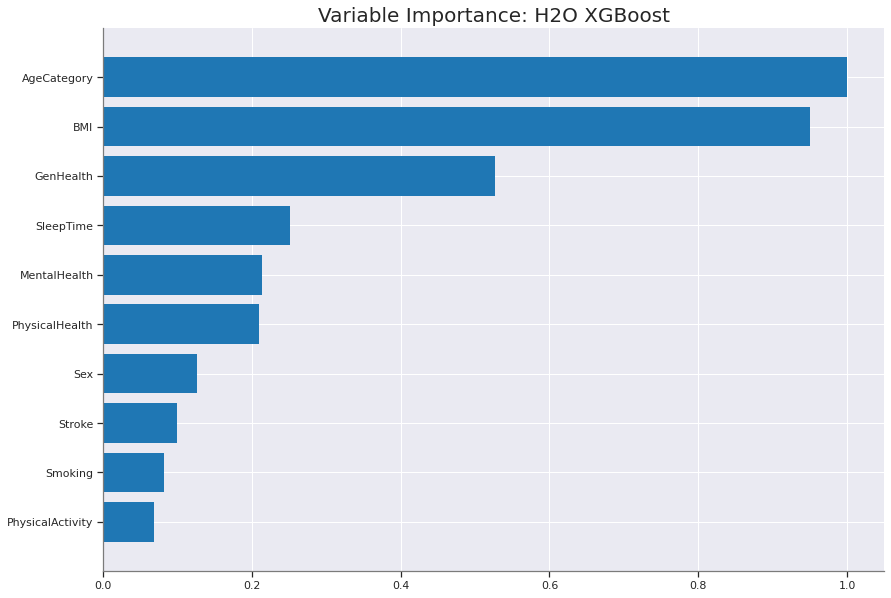

<Figure size 432x288 with 0 Axes>

In [ ]:
xgb.varimp_plot()

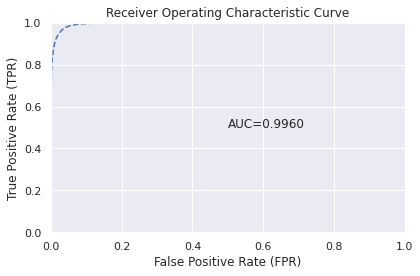

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.276135741652983e-06,
  4.276135741652983e-06,
  4.276135741652983e-06,
  4.276135741652983e-06,
  8.552271483305966e-06,
  1.2828407224958949e-05,
  1.2828407224958949e-05,
  1.2828407224958949e-05,
  1.2828407224958949e-05,
  1.7104542966611933e-05,
  1.7104542966611933e-05,
  2.1380678708264915e-05,
  2.1380678708264915e-05,
  2.1380678708264915e-05,
  2.5656814449917897e-05,
  3.848522167487685e-05,
  5.1313628899835795e-05,
  5.1313628899835795e-05,
  5.558976464148878e-05,
  5.986590038314176e-05,
  6.414203612479475e-05,
  6.841817186644773e-05,
  6.841817186644773e-05,
  6.841817186644773e-05,
  6.841817186644773e-05,
  7.269430760810071e-05,
  8.552271483305966e-05,
  0.00010262725779967159,
  0.00011973180076628352,
  0.00014111247947454843,
  0.

In [ ]:
perf.plot(type = "roc")

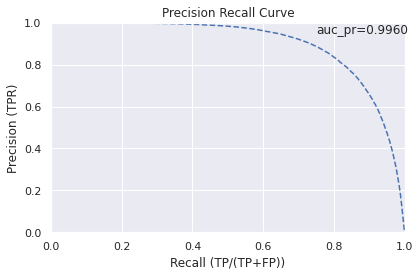

([0.9992302251303116,
  0.998274027014367,
  0.9972408194060101,
  0.9960576277236357,
  0.994903847110011,
  0.9938764372740236,
  0.9930384183557228,
  0.9921571863108668,
  0.9912020328353687,
  0.9901448469018167,
  0.9892938125763093,
  0.9885875300552383,
  0.9874635161849966,
  0.9862603427772235,
  0.9849086234384106,
  0.9836097799293211,
  0.982194499789461,
  0.9811851456245947,
  0.9800207020904735,
  0.978896779352587,
  0.9777106938411367,
  0.9765484497341387,
  0.9752926795246077,
  0.973782159143288,
  0.9723972454960527,
  0.9709291080606987,
  0.9695959911785949,
  0.9679030050909428,
  0.9666793547470173,
  0.9654046986558538,
  0.9638628781781199,
  0.9625941872170776,
  0.9612711874081501,
  0.9597080756907249,
  0.9582515223954309,
  0.956964435554357,
  0.9554145452674211,
  0.9539380744673369,
  0.9526658121826528,
  0.9514964488753156,
  0.9499100587520924,
  0.9484778218807156,
  0.9469522376747235,
  0.9454151638549009,
  0.9439155647889623,
  0.942591619899

In [ ]:
perf.plot(type = "pr")

In [ ]:
h2o.save_model(model=xgb, path="/content/drive/My Drive/Colab Notebooks", force=True)

'/content/drive/My Drive/Colab Notebooks/XGBoost_model_python_1669433954947_51'

In [ ]:
xgb.download_mojo(path="/content/drive/My Drive/Colab Notebooks", get_genmodel_jar=True)

'/content/drive/My Drive/Colab Notebooks/XGBoost_model_python_1669433954947_51.zip'

# Model 4: Multilayer Perceptron (MLP)

In [11]:
from h2o.estimators import H2ODeepLearningEstimator

X_y_train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis='columns'))
#X_test_h2o = h2o.H2OFrame(X_test)
X_y_test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis='columns'))
X_y_train_h2o['HeartDisease'] = X_y_train_h2o['HeartDisease'].asfactor() 
X_y_test_h2o['HeartDisease'] = X_y_test_h2o['HeartDisease'].asfactor() 

dl = H2ODeepLearningEstimator(distribution="bernoulli",
                               nfolds = 5,
                               hidden=[1],
                               epochs=50,
                               keep_cross_validation_fold_assignment = True, 
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=878,
                               tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)
dl.train(x=data.columns.to_list()[1:],                
              y='HeartDisease',
              training_frame = X_y_train_h2o,
              validation_frame = X_y_test_h2o)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1670952356551_1


Status of Neuron Layers: predicting HeartDisease, 2-class classification, bernoulli distribution, CrossEntropy loss, 30 weights/biases, 7.4 KB, 23,393,750 training samples, mini-batch size 1
    layer    units    type     dropout    l1    l2    mean_rate              rate_rms                 momentum    mean_weight         weight_rms         mean_bias               bias_rms
--  -------  -------  -------  ---------  ----  ----  ---------------------  -----------------------  ----------  ------------------  -----------------  ----------------------  -----------------------
    1        25       Input    0.0
    2        1        Tanh     0.0        0.0   0.0   0.0005443089472828433  0.00022975855972617865   0.0         5.013886021822691   7.435285568237305  -0.26375840636541503    1.0971281125650402e-154
    3        2        Softmax             0.0   0.0   0.0018075879197567701  1.0971281125650402e-154  0.0         0.7272484004497528  1.324984073638916  1.5681900222830336e-15  0.22982251644134521

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1614816519549464
RMSE: 0.40184779700148465
LogLoss: 0.4924820497883754
Mean Per-Class Error: 0.2384405145175485
AUC: 0.8408810608093954
AUCPR: 0.8211951779025896
Gini: 0.6817621216187908

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4034339668709287
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      153195  80661   0.3449   (80661.0/233856.0)
1      30882   203137  0.132    (30882.0/234019.0)
Total  184077  283798  0.2384   (111543.0/467875.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.403434     0.78459   233
max f2                       0.179167     0.867435  324
max f0point5                 0.622156     0.767346  144
max accuracy                 0.488254     0.766726  201
max precision                0.894027     0.969397  0
max recall                   0.0479872    1         399
max specificity              0.894027     0.999696  0
max absolute_mcc             0.442446     0.537181  219
max min_per_class_accuracy   0.556308     0.762964  172
max mean_per_class_accuracy  0.488254     0.766709  201
max tns                      0.894027     233785    0
max fns                      0.894027     231770    0
max fps                      0.0479872    233856    399
max tps                      0.0479872    234019    399
max tnr                      0.894027     0.999696  0
max fnr                      0.894027     0.99039   0
max fpr                      0.0479872    1         399
max tpr                      0.0479872    1         399

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 50.57 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100134                   0.892335           1.91651   1.91651            0.958591         0.893448   0.958591                    0.893448            0.0191907       0.0191907                  91.6515    91.6515            0.0183612
2        0.0200246                   0.890203           1.86015   1.88834            0.930401         0.89129    0.944498                    0.892369            0.0186224       0.0378132                  86.0155    88.8338            0.0355896
3        0.0300037                   0.888096      

In [12]:
dl.cross_validation_fold_assignment()
perf = dl.model_performance()
pred = dl.predict(X_y_test_h2o)
feature_interactions = dl.feature_interaction()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
No calculation available for this model


In [13]:
print('Gini Coefficient\n', dl.gini(train=True, valid=True, xval=False))
print('MCC\n', dl.mcc(train=True, valid=True, xval=False))
print('F1\n', dl.F1(train=True, valid=True, xval=False))
print('accuracy\n', dl.accuracy(train=True, valid=True, xval=False))
print('auc\n', dl.auc(train=True, valid=True, xval=False))
print('aucpr\n', dl.aucpr(train=True, valid=True, xval=False))

Gini Coefficient
 {'train': 0.6817621216187908, 'valid': 0.6804396836996842}
MCC
 {'train': [[0.44244636682149524, 0.5371814576825182]], 'valid': [[0.432497241170985, 0.5328397341989438]]}
F1
 {'train': [[0.4034339668709287, 0.7845899226946972]], 'valid': [[0.40811123619304107, 0.782143244457527]]}
accuracy
 {'train': [[0.4882541351029738, 0.7667261554902485]], 'valid': [[0.5138256395923044, 0.764894972172114]]}
auc
 {'train': 0.8408810608093954, 'valid': 0.8402198418498421}
aucpr
 {'train': 0.8211951779025896, 'valid': 0.8198162165411181}


In [14]:
dl.score_history()

timestamp           duration  training_speed  epochs  \
0     2022-12-13 17:49:47          0.000 sec            None     0.0   
1     2022-12-13 17:49:49  17 min 32.900 sec  196917 obs/sec     1.0   
2     2022-12-13 17:49:54  17 min 37.031 sec  194947 obs/sec     2.0   
3     2022-12-13 17:49:58  17 min 41.142 sec  196944 obs/sec     3.0   
4     2022-12-13 17:50:02  17 min 45.143 sec  197832 obs/sec     4.0   
5     2022-12-13 17:50:06  17 min 49.155 sec  198453 obs/sec     5.0   
6     2022-12-13 17:50:10  17 min 53.148 sec  198799 obs/sec     6.0   
7     2022-12-13 17:50:14  17 min 57.225 sec  198769 obs/sec     7.0   
8     2022-12-13 17:50:18  18 min  1.218 sec  199095 obs/sec     8.0   
9     2022-12-13 17:50:22  18 min  5.224 sec  199321 obs/sec     9.0   
10    2022-12-13 17:50:26  18 min  9.229 sec  199716 obs/sec    10.0   
11    2022-12-13 17:50:31  18 min 14.526 sec  190531 obs/sec    11.0   
12    2022-12-13 17:50:35  18 min 18.521 sec  191327 obs/sec    12.0   
13    2022-12-13 17:50:39  18 min 22.508 sec  192121 obs/sec    13.0   
14    2022-12-13 17:50:43  18 min 26.509 sec  192722 obs/sec    14.0   
15    2022-12-13 17:50:47  18 min 30.500 sec  193256 obs/sec    15.0   
16    2022-12-13 17:50:51  18 min 34.499 sec  193671 obs/sec    16.0   
17    2022-12-13 17:50:55  18 min 38.471 sec  194181 obs/sec    17.0   
18    2022-12-13 17:50:59  18 min 42.483 sec  194529 obs/sec    18.0   
19    2022-12-13 17:51:03  18 min 46.536 sec  194841 obs/sec    19.0   
20    2022-12-13 17:51:07  18 min 50.618 sec  194854 obs/sec    20.0   
21    2022-12-13 17:51:11  18 min 54.703 sec  194847 obs/sec    21.0   
22    2022-12-13 17:51:15  18 min 58.837 sec  194770 obs/sec    22.0   
23    2022-12-13 17:51:20  19 min  2.997 sec  194616 obs/sec    23.0   
24    2022-12-13 17:51:24  19 min  6.974 sec  194958 obs/sec    24.0   
25    2022-12-13 17:51:28  19 min 11.027 sec  195227 obs/sec    25.0   
26    2022-12-13 17:51:32  19 min 15.008 sec  195455 obs/sec    26.0   
27    2022-12-13 17:51:36  19 min 19.010 sec  195672 obs/sec    27.0   
28    2022-12-13 17:51:40  19 min 22.999 sec  195895 obs/sec    28.0   
29    2022-12-13 17:51:44  19 min 27.010 sec  196108 obs/sec    29.0   
30    2022-12-13 17:51:48  19 min 31.035 sec  196308 obs/sec    30.0   
31    2022-12-13 17:51:52  19 min 35.075 sec  196423 obs/sec    31.0   
32    2022-12-13 17:51:56  19 min 39.176 sec  196392 obs/sec    32.0   
33    2022-12-13 17:52:00  19 min 43.252 sec  196336 obs/sec    33.0   
34    2022-12-13 17:52:04  19 min 48.490 sec  195230 obs/sec    34.0   
35    2022-12-13 17:52:09  19 min 52.590 sec  195208 obs/sec    35.0   
36    2022-12-13 17:52:13  19 min 56.710 sec  195157 obs/sec    36.0   
37    2022-12-13 17:52:18  20 min  0.985 sec  194787 obs/sec    37.0   
38    2022-12-13 17:52:22  20 min  5.095 sec  194766 obs/sec    38.0   
39    2022-12-13 17:52:26  20 min  9.183 sec  194756 obs/sec    39.0   
40    2022-12-13 17:52:30  20 min 13.302 sec  194730 obs/sec    40.0   
41    2022-12-13 17:52:34  20 min 17.429 sec  194716 obs/sec    41.0   
42    2022-12-13 17:52:38  20 min 21.511 sec  194737 obs/sec    42.0   
43    2022-12-13 17:52:42  20 min 25.572 sec  194778 obs/sec    43.0   
44    2022-12-13 17:52:46  20 min 29.669 sec  194787 obs/sec    44.0   
45    2022-12-13 17:52:50  20 min 33.780 sec  194754 obs/sec    45.0   
46    2022-12-13 17:52:55  20 min 37.864 sec  194780 obs/sec    46.0   
47    2022-12-13 17:52:59  20 min 42.034 sec  194635 obs/sec    47.0   
48    2022-12-13 17:53:03  20 min 46.081 sec  194680 obs/sec    48.0   
49    2022-12-13 17:53:07  20 min 50.215 sec  194651 obs/sec    49.0   
50    2022-12-13 17:53:11  20 min 54.260 sec  194714 obs/sec    50.0   

    iterations     samples  training_rmse  training_logloss  training_r2  ...  \
0            0         0.0            NaN               NaN          NaN  ...   
1            1    467875.0       0.402433          0.493608     0.352190  ...   
2            2    935750.0  

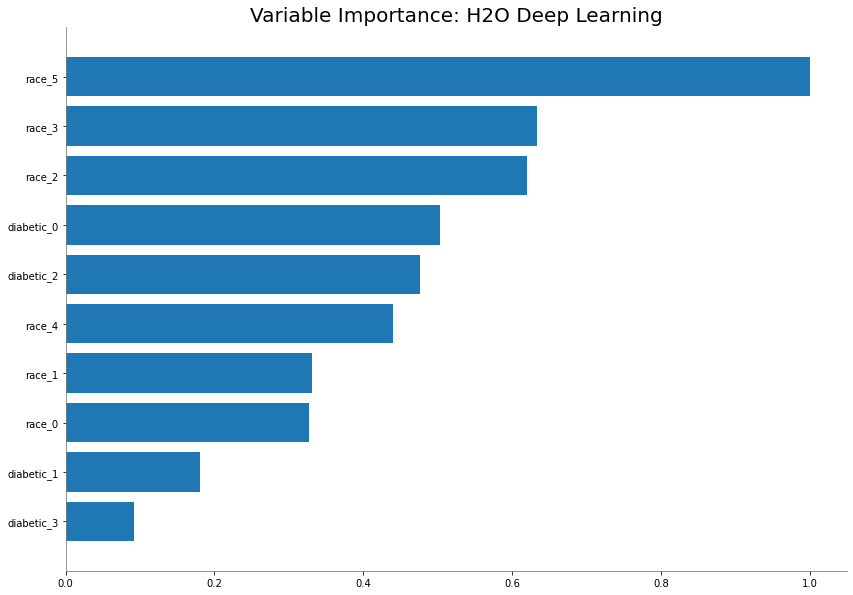

<Figure size 432x288 with 0 Axes>

In [15]:
dl.varimp_plot()

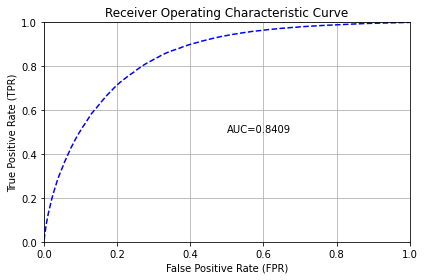

([0.0003036056376573618,
  0.0009193691844553913,
  0.001753215654077723,
  0.0026512041598248494,
  0.003502155172413793,
  0.00434455391351943,
  0.005383654898741106,
  0.006478345648604269,
  0.007577312534209086,
  0.008646346469622332,
  0.009706828133552272,
  0.01070744389709907,
  0.011746544882320744,
  0.012952415161466885,
  0.014068486590038315,
  0.0150519978106185,
  0.016073994252873564,
  0.017023296387520526,
  0.018130815544608648,
  0.01914853585112206,
  0.020234674329501916,
  0.021384954844006567,
  0.022522406951286263,
  0.02355295566502463,
  0.024844348659003833,
  0.025755165571975918,
  0.026811371100164204,
  0.027799158456486044,
  0.028876744663382595,
  0.02992867405582923,
  0.031053297755883964,
  0.03233613847837986,
  0.03345648604269294,
  0.03466663245758073,
  0.03589815955117679,
  0.037078373015873016,
  0.03829707170224412,
  0.03946445675971538,
  0.04069598385331144,
  0.04195744389709907,
  0.04336001642036125,
  0.044582991242474,
  0.0456

In [16]:
perf.plot(type = "roc")

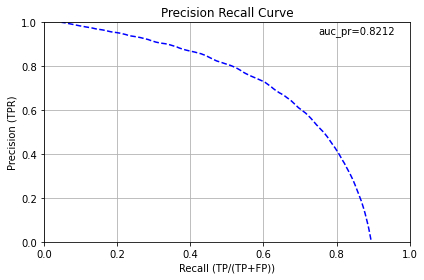

([0.8940269483532826,
  0.8927491010639914,
  0.8914832577651564,
  0.8901909359844212,
  0.8888874080723745,
  0.8876772192631309,
  0.8863055899880049,
  0.8848714915583094,
  0.8834528338848918,
  0.8820946861434475,
  0.8807765803089359,
  0.8794121363741012,
  0.8779326887884433,
  0.8765151433973374,
  0.8750075333305708,
  0.8736740520043047,
  0.8722110080716091,
  0.8709613862390279,
  0.8696378484083186,
  0.8682418127658358,
  0.8667102770193502,
  0.865177650640068,
  0.8636243371345611,
  0.8620354699436512,
  0.8606240260844955,
  0.8591178170625963,
  0.8576412521526049,
  0.8562735523779754,
  0.8548543601582841,
  0.8534435946005979,
  0.8520746717663308,
  0.850652195343075,
  0.849196109409334,
  0.8477033888827356,
  0.8459801423075854,
  0.8443964637895052,
  0.8427947089431149,
  0.8410487505606581,
  0.8394228749200174,
  0.8378895653154924,
  0.836293651015376,
  0.8346240750262882,
  0.8332168728348224,
  0.8316423519211752,
  0.8300171301945779,
  0.8283582699

In [17]:
perf.plot(type = "pr")

In [18]:
h2o.save_model(model=dl, path="/content/drive/My Drive/Colab Notebooks", force=True)

'/content/drive/My Drive/Colab Notebooks/DeepLearning_model_python_1670952356551_1'

In [ ]:
dl.download_mojo(path="/content/drive/My Drive/Colab Notebooks", get_genmodel_jar=True)

# Model 5: Random Forest (RF)

In [ ]:
from h2o.estimators import H2ORandomForestEstimator

rf = H2ORandomForestEstimator(#hyper_params=hy_params,
                                    ntrees=70,
                                    max_depth=15,
                                    min_rows=10,
                                    calibrate_model=True,
                                    nfolds = 5,
                                    seed = 878,
                                    keep_cross_validation_fold_assignment = True, 
                                    calibration_frame= X_y_test_h2o,
                                    binomial_double_trees=True)

rf.train(x=data.columns.to_list()[1:],                
              y='HeartDisease',
              training_frame = X_y_train_h2o,
              validation_frame = X_y_test_h2o)



drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1670340111085_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    70                 140                         8.10108e+06            15           15           15            3817          5148          4596.22

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.13719532446555877
RMSE: 0.3703988721170176
LogLoss: 0.42812510647890145
Mean Per-Class Error: 0.20010126657397098
AUC: 0.8866030214793655
AUCPR: 0.8762143265653729
Gini: 0.7732060429587311

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4384669956015422
       0       1       Error    Rate
-----  ------  ------  -------  ------------------
0      166430  67426   0.2883   (67426.0/233856.0)
1      26182   207837  0.1119   (26182.0/234019.0)
Total  192612  275263  0.2001   (93608.0/467875.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.438467     0.816196  230
max f2                       0.241551     0.88644   300
max f0point5                 0.631319     0.8117    158
max accuracy                 0.526999     0.805796  199
max precision                0.993661     1         0
max recall                   0.022577     1         397
max specificity              0.993661     1         0
max absolute_mcc             0.518352     0.612819  202
max min_per_class_accuracy   0.564195     0.804217  184
max mean_per_class_accuracy  0.526999     0.805786  199
max tns                      0.993661     233856    0
max fns                      0.993661     233889    0
max fps                      0.0158214    233856    399
max tps                      0.022577     234019    397
max tnr                      0.993661     1         0
max fnr                      0.993661     0.999444  0
max fpr                      0.0158214    1         399
max tpr                      0.022577     1         397

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 50.13 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100005                   0.957158           1.98307    1.98307            0.991879         0.970619   0.991879                    0.970619            0.0198317       0.0198317                  98.3066   98.3066            0.0196692
2        0.0200011                   0.941356           1.96256    1.97281            0.98162          0.948674   0.986749                    0.959646            0.0196266       0.0394583                  96.2556   97.2811            0.0389281
3        0.0300016                   0.930066           1.94546    1.9637             0.973071         0.935597   0.98219                     0.95163             0.0194557       0.058914                   94.5465   96.3696            0.057845
4        0.04                        0.92018            1.92665    1.95444            0.96366          0.924998   0.977558                    0.944973            0.0192634       0.0781774                  92.6648   95.4435            0.0763814
5        0.0500005                   0.911222           1.90487    1.94452            0.952768         0.

In [ ]:
rf.cross_validation_fold_assignment()
perf = rf.model_performance()
pred = rf.predict(X_y_test_h2o)
feature_interactions = rf.feature_interaction()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
No calculation available for this model


In [ ]:
print('Gini Coefficient\n', rf.gini(train=True, valid=True, xval=False))
print('MCC\n', rf.mcc(train=True, valid=True, xval=False))
print('F1\n', rf.F1(train=True, valid=True, xval=False))
print('accuracy\n', rf.accuracy(train=True, valid=True, xval=False))
print('auc\n', rf.auc(train=True, valid=True, xval=False))
print('aucpr\n', rf.aucpr(train=True, valid=True, xval=False))

Gini Coefficient
 {'train': 0.7732060429587311, 'valid': 0.7735468514755186}
MCC
 {'train': [[0.51835198114803, 0.6128193725158805]], 'valid': [[0.5123294106900866, 0.6097139604986056]]}
F1
 {'train': [[0.4384669956015422, 0.8161961349507739]], 'valid': [[0.4301191087380608, 0.8142167562450615]]}
accuracy
 {'train': [[0.5269993364418007, 0.8057964199839701]], 'valid': [[0.5305607304229157, 0.8042900255623284]]}
auc
 {'train': 0.8866030214793655, 'valid': 0.8867734257377593}
aucpr
 {'train': 0.8762143265653729, 'valid': 0.8767717077011764}


In [ ]:
rf.score_history()

timestamp           duration  number_of_trees  training_rmse  \
0     2022-12-06 15:46:46  22 min 10.299 sec              0.0            NaN   
1     2022-12-06 15:46:49  22 min 13.645 sec              1.0       0.391669   
2     2022-12-06 15:46:57  22 min 22.103 sec              4.0       0.384423   
3     2022-12-06 15:47:09  22 min 33.363 sec              8.0       0.378779   
4     2022-12-06 15:47:20  22 min 44.768 sec             12.0       0.375674   
5     2022-12-06 15:47:35  22 min 59.178 sec             17.0       0.373690   
6     2022-12-06 15:47:55  23 min 19.190 sec             24.0       0.372336   
7     2022-12-06 15:48:20  23 min 44.810 sec             33.0       0.371559   
8     2022-12-06 15:48:54  24 min 19.121 sec             45.0       0.371080   
9     2022-12-06 15:49:43  25 min  8.076 sec             62.0       0.370487   
10    2022-12-06 15:50:10  25 min 35.107 sec             70.0       0.370399   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0                NaN           NaN              NaN            NaN   
1           0.563449      0.855348         0.828869       1.833500   
2           0.502983      0.864940         0.841224       1.863638   
3           0.459323      0.873231         0.854685       1.895493   
4           0.443544      0.877928         0.861992       1.937531   
5           0.434821      0.880968         0.866927       1.961702   
6           0.431661      0.883275         0.870986       1.969820   
7           0.430118      0.884530         0.873015       1.980503   
8           0.429320      0.885486         0.874628       1.980930   
9           0.428276      0.886448         0.875893       1.983066   
10          0.428125      0.886603         0.876214       1.983066   

    training_classification_error  validation_rmse  validation_logloss  \
0                             NaN              NaN                 NaN   
1                        0.227273         0.392265            0.553023   
2                        0.215467         0.375241            0.437904   
3                        0.209767         0.373125            0.432786   
4                        0.204934         0.372315            0.431547   
5                        0.203780         0.371835            0.430677   
6                        0.204243         0.371437            0.429734   
7                        0.200680         0.371207            0.429333   
8                        0.199130         0.371125            0.429243   
9                        0.199303         0.370737            0.428561   
10                       0.200071         0.370701            0.428514   

    validation_auc  validation_pr_auc  validation_lift  \
0              NaN                NaN              NaN   
1         0.854858           0.829441         1.855317   
2         0.878604           0.863257         1.959996   
3         0.882374           0.869663         1.959996   
4         0.883848           0.872021         1.971979   
5         0.884610           0.873068         1.977114   
6         0.885385           0.874790         1.977180   
7         0.885768           0.875341         1.977136   
8         0.886082           0.875878         1.975402   
9         0.886736           0.876648         1.980538   
10        0.886773           0.876772         1.982267   

    validation_classification_error  
0                               NaN  
1                          0.232617  
2                          0.207209  
3                          0.204199  
4                          0.203746  
5                          0.206294  
6                          0.203464  
7                          0.203738  
8                          0.202575  
9                          0.203250  
10                         0.203020

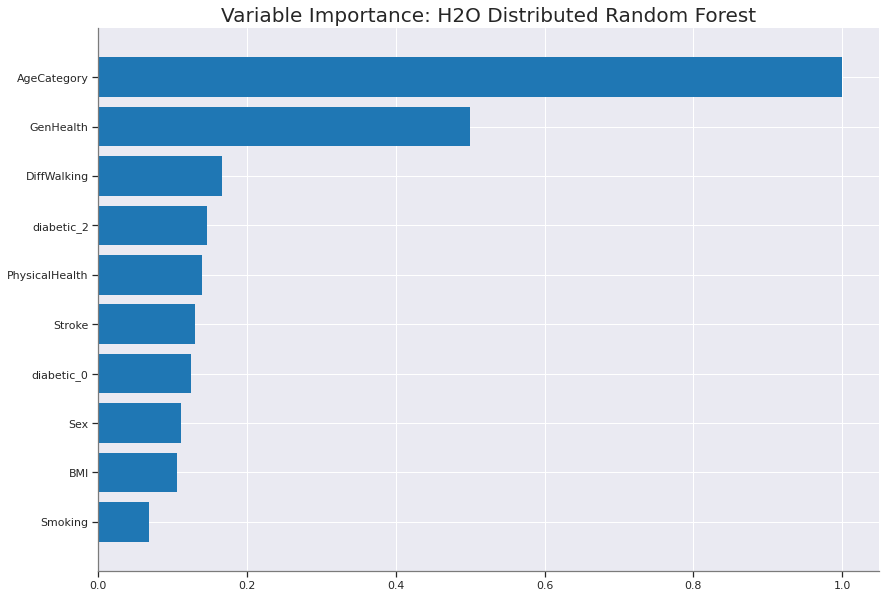

<Figure size 432x288 with 0 Axes>

In [ ]:
rf.varimp_plot()

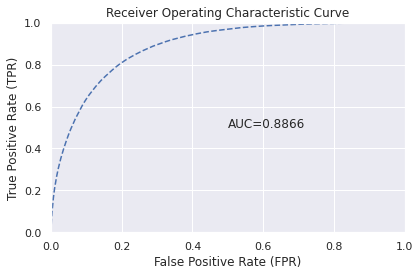

([0.0,
  0.0,
  0.0,
  4.276135741652983e-06,
  8.552271483305966e-06,
  2.993295019157088e-05,
  4.276135741652983e-05,
  7.69704433497537e-05,
  8.979885057471264e-05,
  0.00013256020799124247,
  0.00014111247947454843,
  0.00017532156540777232,
  0.00021380678708264914,
  0.0002736726874657909,
  0.00034209085933223864,
  0.0004318897099069513,
  0.000521688560481664,
  0.0006243158182813356,
  0.0006799055829228243,
  0.0008423987411056376,
  0.0009407498631636563,
  0.0010775862068965517,
  0.0012486316365626711,
  0.0014068486590038314,
  0.0015992747673782156,
  0.0017959770114942528,
  0.002056821291735085,
  0.002253523535851122,
  0.002475882594417077,
  0.0027324507389162563,
  0.002976190476190476,
  0.003091646141215107,
  0.003493602900930487,
  0.00378438013136289,
  0.0040708812260536395,
  0.004357382320744389,
  0.00467381636562671,
  0.004977422003284072,
  0.005353721948549535,
  0.005764230979748221,
  0.006187568418171866,
  0.006491174055829228,
  0.0068760262725

In [ ]:
perf.plot(type = "roc")

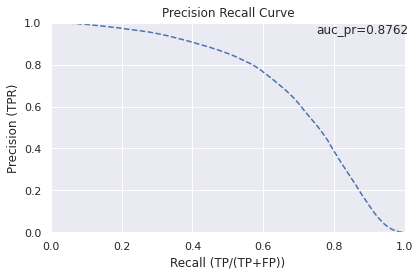

([0.9936608581471574,
  0.9885698756397305,
  0.9852431505034847,
  0.9815864390486665,
  0.9783675627325259,
  0.9751778549085666,
  0.9712703663488912,
  0.9673455025619436,
  0.9648111595211096,
  0.9622211291469923,
  0.9598702200522586,
  0.9578626745302897,
  0.9549116471465519,
  0.9517847993137771,
  0.9486850940827433,
  0.9458814244617181,
  0.943053710438711,
  0.9401372847800573,
  0.9384087625042845,
  0.9364541397990755,
  0.933891117871512,
  0.9311599050355368,
  0.9285758982250948,
  0.9260779438026001,
  0.9238987296628076,
  0.9214189488696346,
  0.9189576521178369,
  0.9168388548015607,
  0.9148506758125249,
  0.9124401373643353,
  0.9101382523532321,
  0.9082011982479103,
  0.905920839941991,
  0.903413506727888,
  0.9012281540849736,
  0.8991571572620963,
  0.8969151338049117,
  0.8946522895356499,
  0.8923167303295655,
  0.8900935144820483,
  0.8874217031438394,
  0.884900074186088,
  0.8827933238260236,
  0.8806397514670691,
  0.8785077527042917,
  0.87630297329

In [ ]:
perf.plot(type = "pr")

In [ ]:
h2o.save_model(model=rf, path="/content/drive/My Drive/Colab Notebooks", force=True)

'/content/drive/My Drive/Colab Notebooks/DRF_model_python_1670340111085_1'

In [ ]:
rf.download_mojo(path="/content/drive/My Drive/Colab Notebooks", get_genmodel_jar=True)

# Model 6: Gradient boosting (GBDT) (H2o version)

In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
h2o.init()


X_y_train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis='columns'))
#X_test_h2o = h2o.H2OFrame(X_test)
X_y_test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis='columns'))
X_y_train_h2o['HeartDisease'] = X_y_train_h2o['HeartDisease'].asfactor() 
X_y_test_h2o['HeartDisease'] = X_y_test_h2o['HeartDisease'].asfactor() 

gbm = H2OGradientBoostingEstimator( #hyper_params=hy_params
                          max_depth = 16,
                          ntrees = 120,
                          learn_rate = 0.3,
                          keep_cross_validation_fold_assignment = True, 
                          nfolds = 5, #Cross validation five fold
                          seed=878)


gbm.train(x=data.columns.to_list()[1:],                
              y='HeartDisease',
              training_frame = X_y_train_h2o,
              validation_frame = X_y_test_h2o)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         4 mins 08 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_rcjrgj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    11.99 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.15 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1669576825460_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          2.14993e+06            0            16           15.5          1             7998          5341.66

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.04812434717474301
RMSE: 0.21937262175290473
LogLoss: 0.17731279513854656
Mean Per-Class Error: 0.05715285099828147
AUC: 0.9889554991897426
AUCPR: 0.9889343265167929
Gini: 0.9779109983794851

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5432824786230265
       0       1       Error    Rate
-----  ------  ------  -------  ------------------
0      218496  15360   0.0657   (15360.0/233856.0)
1      11379   222640  0.0486   (11379.0/234019.0)
Total  229875  238000  0.0571   (26739.0/467875.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.543282     0.943352  198
max f2                       0.353273     0.964055  251
max f0point5                 0.67431      0.950373  156
max accuracy                 0.543282     0.94285   198
max precision                0.997884     1         0
max recall                   0.0358518    1         370
max specificity              0.997884     1         0
max absolute_mcc             0.543282     0.885828  198
max min_per_class_accuracy   0.571466     0.941676  190
max mean_per_class_accuracy  0.543282     0.942847  198
max tns                      0.997884     233856    0
max fns                      0.997884     232759    0
max fps                      0.00203235   233856    399
max tps                      0.0358518    234019    370
max tnr                      0.997884     1         0
max fnr                      0.997884     0.994616  0
max fpr                      0.00203235   1         399
max tpr                      0.0358518    1         370

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 50.01 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100005                   0.995403           1.9993      1.9993             1                0.996679    1                           0.996679            0.0199941       0.0199941                  99.9303   99.9303            0.0199941
2        0.0200182                   0.993583           1.9993      1.9993             1                0.994421    1                           0.995549            0.0200283       0.0400224                  99.9303   99.9303            0.0400224
3        0.0300059                   0.991919           1.9993      1.9993             1                0.992743    1                           0.994615            0.0199685       0.0599909                  99.9303   99.9303            0.0599909
4        0.0400064                   0.990369           1.9993      1.9993             1                0.991129    1                           0.993744            0.0199941       0.079985                   99.9303   99.9303            0.079985
5        0.0500112                   0.988781           1.9993      1.9993             1

In [ ]:
gbm.cross_validation_fold_assignment()
perf = gbm.model_performance()
pred = gbm.predict(X_y_test_h2o)
#feature_interactions = gbm.feature_interaction()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
print('Gini Coefficient\n', gbm.gini(train=True, valid=True, xval=False))
print('MCC\n', gbm.mcc(train=True, valid=True, xval=False))
print('F1\n', gbm.F1(train=True, valid=True, xval=False))
print('accuracy\n', gbm.accuracy(train=True, valid=True, xval=False))
print('auc\n', gbm.auc(train=True, valid=True, xval=False))
print('aucpr\n', gbm.aucpr(train=True, valid=True, xval=False))

Gini Coefficient
 {'train': 0.9779109983794851, 'valid': 0.9415814890890952}
MCC
 {'train': [[0.5432824786230265, 0.8858278235433262]], 'valid': [[0.5576391423482415, 0.8226347614380367]]}
F1
 {'train': [[0.5432824786230265, 0.9433518565989928]], 'valid': [[0.5576391423482415, 0.912962700680669]]}
accuracy
 {'train': [[0.5432824786230265, 0.9428501202244189]], 'valid': [[0.5873031042797101, 0.9110704545648847]]}
auc
 {'train': 0.9889554991897426, 'valid': 0.9707907445445476}
aucpr
 {'train': 0.9889343265167929, 'valid': 0.9656546199802082}


In [ ]:
gbm.score_history()

timestamp           duration  number_of_trees  training_rmse  \
0     2022-11-27 19:30:41   5 min 41.775 sec              0.0       0.500000   
1     2022-11-27 19:30:44   5 min 44.713 sec              1.0       0.431872   
2     2022-11-27 19:30:52   5 min 53.345 sec              5.0       0.329894   
3     2022-11-27 19:30:59   5 min 59.733 sec              8.0       0.299430   
4     2022-11-27 19:31:05   6 min  6.082 sec             11.0       0.276989   
5     2022-11-27 19:31:11   6 min 12.220 sec             14.0       0.260430   
6     2022-11-27 19:31:17   6 min 18.395 sec             17.0       0.245090   
7     2022-11-27 19:31:23   6 min 24.109 sec             20.0       0.235032   
8     2022-11-27 19:31:29   6 min 30.250 sec             24.0       0.227299   
9     2022-11-27 19:31:35   6 min 36.246 sec             29.0       0.219730   
10    2022-11-27 19:31:38   6 min 39.140 sec             32.0       0.219373   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500174       1.000000   
1           0.563525      0.906009         0.900417       1.999303   
2           0.370915      0.942763         0.939840       1.999303   
3           0.310870      0.957747         0.955723       1.999303   
4           0.269960      0.968881         0.967640       1.999303   
5           0.241799      0.976001         0.975496       1.999303   
6           0.217103      0.981860         0.981526       1.999303   
7           0.201029      0.984973         0.984775       1.999303   
8           0.188978      0.987037         0.986913       1.999303   
9           0.178095      0.988902         0.988881       1.999303   
10          0.177313      0.988955         0.988934       1.999303   

    training_classification_error  validation_rmse  validation_logloss  \
0                        0.499826         0.500000            0.693148   
1                        0.180856         0.436895            0.572459   
2                        0.132510         0.347266            0.398583   
3                        0.113612         0.322604            0.346859   
4                        0.095936         0.305446            0.312725   
5                        0.082875         0.292790            0.288809   
6                        0.072714         0.281219            0.267572   
7                        0.066522         0.273543            0.253534   
8                        0.062012         0.267979            0.243505   
9                        0.057285         0.262771            0.234801   
10                       0.057150         0.262603            0.234421   

    validation_auc  validation_pr_auc  validation_lift  \
0         0.500000           0.499303         1.000000   
1         0.882739           0.856295         1.858592   
2         0.920428           0.904964         1.951612   
3         0.935394           0.922183         1.960033   
4         0.946536           0.935592         1.973691   
5         0.954532           0.946035         1.987424   
6         0.961402           0.954009         1.982285   
7         0.965530           0.959074         1.978826   
8         0.968310           0.962655         1.989097   
9         0.970769           0.965751         1.983961   
10        0.970791           0.965655         1.987398   

    validation_classification_error  
0                          0.500697  
1                          0.202088  
2                          0.155067  
3                          0.138122  
4                          0.124229  
5                          0.112064  
6                          0.103857  
7                          0.097932  
8                          0.093521  
9                          0.089220  
10                         0.089314

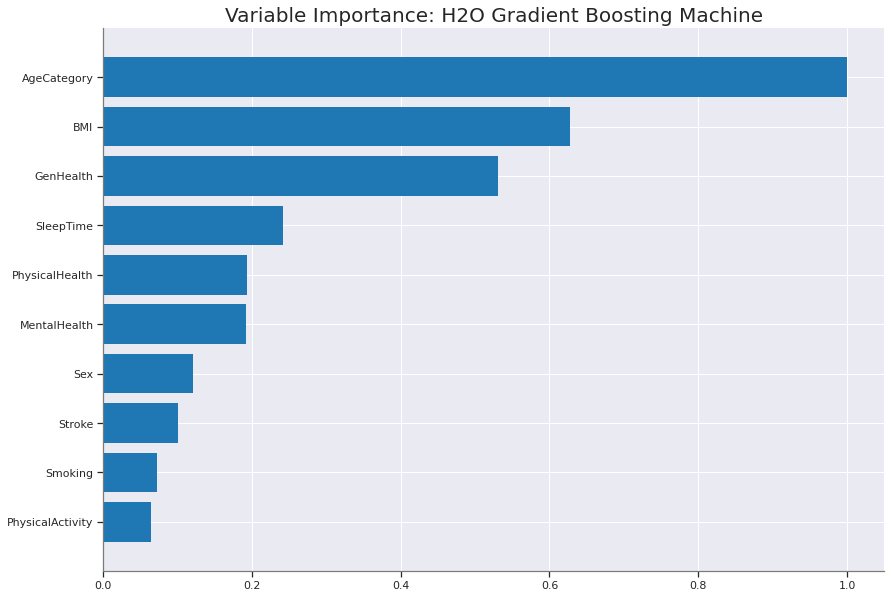

<Figure size 432x288 with 0 Axes>

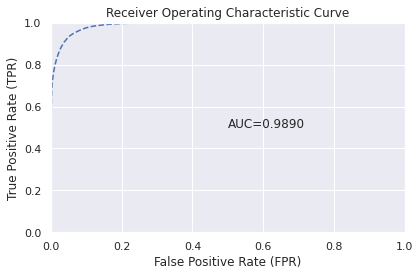

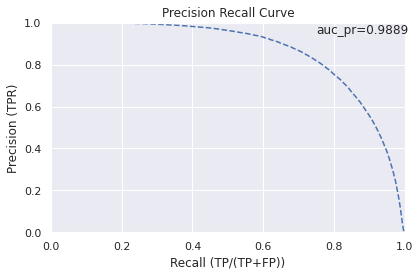

([0.9978844079906088,
  0.9964817991880282,
  0.9953128548079966,
  0.9942044133588117,
  0.9930688481796526,
  0.9918142230041277,
  0.9905914034266405,
  0.9893892781011806,
  0.9883091798270881,
  0.9871695425251609,
  0.9860899618515547,
  0.9849153530572397,
  0.9836639147992172,
  0.9823106024146747,
  0.980925721867222,
  0.9794707508264231,
  0.9783205562211532,
  0.9771271902072276,
  0.9758859679854259,
  0.9744582638631676,
  0.9729629018446504,
  0.9717002864189012,
  0.9701264624483064,
  0.9684739293389854,
  0.9675898386533481,
  0.9663037278070729,
  0.9646315820861769,
  0.9630034214477824,
  0.9615119022933005,
  0.9605391432392583,
  0.9592838999350409,
  0.9576268111784826,
  0.9559051953646573,
  0.9543044516548678,
  0.9530409676154087,
  0.9519367036002614,
  0.9501479277382217,
  0.9482699847669511,
  0.9466463428302171,
  0.9449924677762432,
  0.9435785105519738,
  0.9419748522202412,
  0.9405008697309751,
  0.9390655288580495,
  0.9374925653139807,
  0.9355270

In [ ]:
gbm.varimp_plot()
perf.plot(type = "roc")
perf.plot(type = "pr")

In [ ]:
h2o.save_model(model=gbm, path="/content/drive/My Drive/Colab Notebooks", force=True)

'/content/drive/My Drive/Colab Notebooks/GBM_model_python_1669576825460_1'

In [ ]:
gbm.download_mojo(path="/content/drive/My Drive/Colab Notebooks", get_genmodel_jar=True)

# Model 7: Gradient boosting (GBDT) (scikit-learn  version)

In [ ]:
param_e = {'n_estimators':range(80,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=787), 
                       param_grid = param_e, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_md = {'max_depth':range(3,12,2), 'min_samples_split':range(30,301,30)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_md, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_mf = {'max_features':range(7,20,2)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_leaf =60, 
               min_samples_split =200, subsample=0.8, random_state=10), 
                       param_grid = param_mf, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
GBDTModel = GradientBoostingClassifier(n_estimators=120, max_depth=16, learning_rate=0.3, random_state=98)
GBDTModel.fit(X_train, y_train)
print(GBDTModel.score(X_train, y_train))
print(GBDTModel.score(X_test, y_test))

0.9965012022441891
0.9743521787824124


In [34]:
print(classification_report(y_test,GBDTModel.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     58566
           1       0.95      1.00      0.97     58403

    accuracy                           0.97    116969
   macro avg       0.98      0.97      0.97    116969
weighted avg       0.98      0.97      0.97    116969



Text(0.5, 1.0, 'Feature Importance')

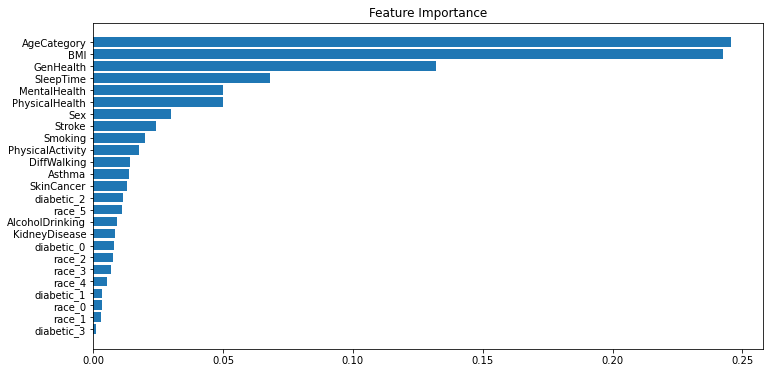

In [ ]:
feature_importance = GBDTModel.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')   

#Further tuning
(on best GBDT model)

In [ ]:
data_re1= data.drop('AgeCategory',axis=1)
X_re1 = data_re1.copy()            
y_re1 = X_re1.pop('HeartDisease')
ROS = RandomOverSampler(random_state=878) # due to the severe class imbalance (the target)
X_re1, y_re1 = ROS.fit_resample(X_re1, y_re1)
X_train_re1, X_test_re1, y_train_re1, y_test_re1 = train_test_split(X_re1, y_re1, test_size=0.2, random_state=878)

In [ ]:
GBDTModel_re1 = GradientBoostingClassifier(n_estimators=120, max_depth=16, learning_rate=0.3, random_state=676)
GBDTModel_re1.fit(X_train_re1, y_train_re1)
print(GBDTModel_re1.score(X_train_re1, y_train_re1))
print(GBDTModel_re1.score(X_test_re1, y_test_re1))

0.9789589389091087
0.9526428579570714


In [31]:
print(classification_report(y_test_re1,GBDTModel_re1.predict(X_test_re1)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     87903
           1       0.93      0.98      0.95     87551

    accuracy                           0.95    175454
   macro avg       0.95      0.95      0.95    175454
weighted avg       0.95      0.95      0.95    175454



Text(0.5, 1.0, 'Feature Importance')

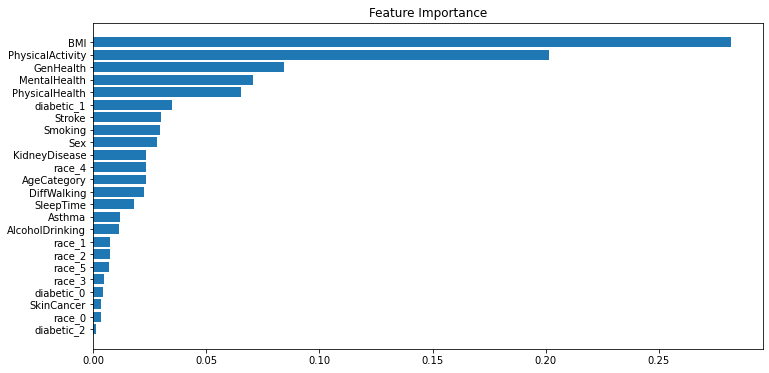

In [35]:
feature_importance = GBDTModel_re1.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')   

In [ ]:
data_re2= data.drop('BMI',axis=1)
X_re2 = data_re2.copy()            
y_re2 = X_re2.pop('HeartDisease')
ROS = RandomOverSampler(random_state=8) # due to the severe class imbalance (the target)
X_re2, y_re2 = ROS.fit_resample(X_re2, y_re2)
X_train_re2, X_test_re2, y_train_re2, y_test_re2 = train_test_split(X_re2, y_re2, test_size=0.2, random_state=98)
GBDTModel_re2 = GradientBoostingClassifier(n_estimators=120, max_depth=16, learning_rate=0.3, random_state=76)
GBDTModel_re2.fit(X_train_re2, y_train_re2)
print(GBDTModel_re2.score(X_train_re2, y_train_re2))
print(GBDTModel_re2.score(X_test_re2, y_test_re2))

0.9249414907827945
0.9093178534483496


In [32]:
print(classification_report(y_test_re2,GBDTModel_re2.predict(X_test_re2)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     58310
           1       0.88      0.94      0.91     58659

    accuracy                           0.91    116969
   macro avg       0.91      0.91      0.91    116969
weighted avg       0.91      0.91      0.91    116969



Text(0.5, 1.0, 'Feature Importance')

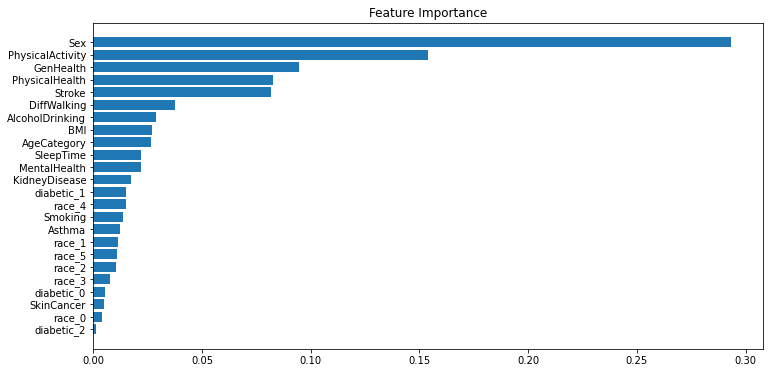

In [36]:
feature_importance = GBDTModel_re2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')   

In [ ]:
data_re3= data.drop('GenHealth',axis=1)
X_re3 = data_re3.copy()            
y_re3 = X_re3.pop('HeartDisease')
ROS = RandomOverSampler(random_state=987) # due to the severe class imbalance (the target)
X_re3, y_re3 = ROS.fit_resample(X_re3, y_re3)
X_train_re3, X_test_re3, y_train_re3, y_test_re3 = train_test_split(X_re3, y_re3, test_size=0.2, random_state=98)
GBDTModel_re3 = GradientBoostingClassifier(n_estimators=120, max_depth=16, learning_rate=0.3, random_state=875)
GBDTModel_re3.fit(X_train_re3, y_train_re3)
print(GBDTModel_re3.score(X_train_re3, y_train_re3))
print(GBDTModel_re3.score(X_test_re3, y_test_re3))

0.9907218808442426
0.9682821944275833


In [33]:
print(classification_report(y_test_re3,GBDTModel_re3.predict(X_test_re3)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     58310
           1       0.94      1.00      0.97     58659

    accuracy                           0.97    116969
   macro avg       0.97      0.97      0.97    116969
weighted avg       0.97      0.97      0.97    116969



Text(0.5, 1.0, 'Feature Importance')

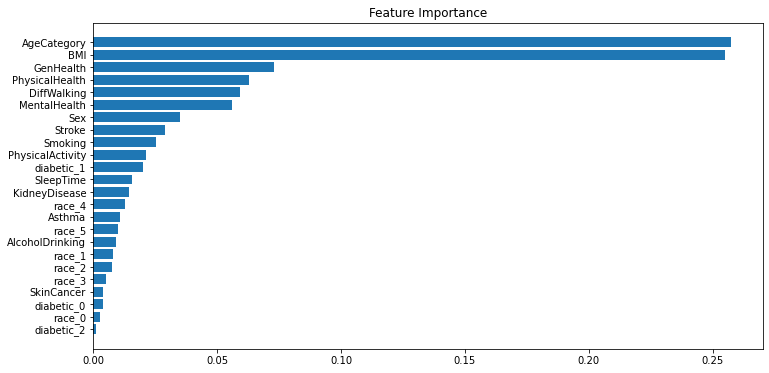

In [37]:
feature_importance = GBDTModel_re3.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')   

In [10]:
data_re2= data.drop('BMI',axis=1)
X_re2 = data_re2.copy()            
y_re2 = X_re2.pop('HeartDisease')
ROS = RandomOverSampler(random_state=8) # due to the severe class imbalance (the target)
X_re2, y_re2 = ROS.fit_resample(X_re2, y_re2)
X_train_re2, X_test_re2, y_train_re2, y_test_re2 = train_test_split(X_re2, y_re2, test_size=0.2, random_state=98)
GBDTModel_rre2 = GradientBoostingClassifier(n_estimators=120, max_depth=16, learning_rate=0.3, random_state=897)
GBDTModel_rre2.fit(X_train_re2, y_train_re2)
print(GBDTModel_rre2.score(X_train_re2, y_train_re2))
print(GBDTModel_rre2.score(X_test_re2, y_test_re2))

0.9249414907827945
0.9089758824987817


In [14]:
print(classification_report(y_test_re2,GBDTModel_rre2.predict(X_test_re2)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     58310
           1       0.88      0.94      0.91     58659

    accuracy                           0.91    116969
   macro avg       0.91      0.91      0.91    116969
weighted avg       0.91      0.91      0.91    116969



Text(0.5, 1.0, 'Feature Importance')

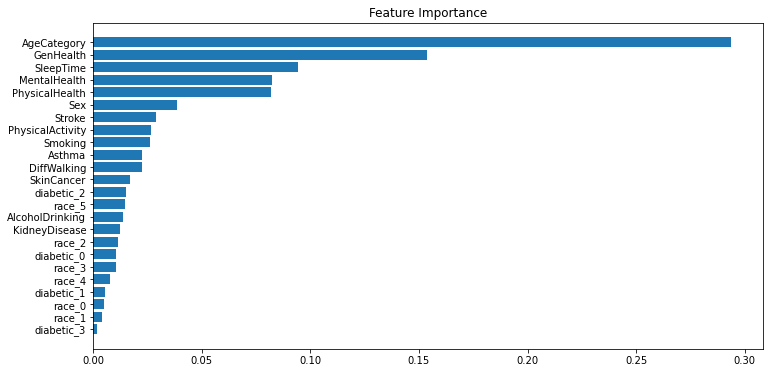

In [16]:
feature_importance = GBDTModel_rre2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test_re2.columns)[sorted_idx])
plt.title('Feature Importance')  

# Missing Data

## Randomly creates missing data (N/A)

In [ ]:
import random
ix = [(row, col) for row in range(data.shape[0]) for col in range(data.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    data.iat[row, col] = np.nan

In [ ]:
data.head()

In [ ]:
data.info()